#**G2M CASE STUDY**

---














##**1. INTRODUCTION**





> XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

> Where does the data for the Case Study come from? The data used in this Case Study is about the information for Pink Cab Company and Yellow Cab Company; this is on four dataset provided: Cab_Data.csv, City.csv, Customer_ID.csv, Transaction_ID.csv.

> Besides the info provided , I found the following additional info on the different website:Holidays.csv, WeatherEvents.csv

##**2. LOADING THE RAW DATA**



###**2.1.   Cloning Dataset and Installing libraries**






In [2]:
'File cloning from github repository'
!git clone https://github.com/marelly1/G2M.git

Cloning into 'G2M'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 46 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [3]:
'Installing package Statsmodels for statistical testing and statistical data exploration'
!pip install statsmodels

In [4]:
'Installing package plotly to plot interactive charts'
!pip install -U plotly

     |████████████████████████████████| 13.2MB 312kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
'Installing package chart_studio: this provides a web-service for hosting graphs'
!pip install chart_studio

     |████████████████████████████████| 71kB 860kB/s 


In [67]:
!pip install pingouin

     |████████████████████████████████| 204kB 4.2MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=6a7019a327d3af1b7bb9602cc469004d98d6021ed5d677d3b8ae6f3fa080ae4e
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for outdated: filename=outdated-0.2.0-cp37-none-any.whl size=4962 sha256=0bc7e29477ce87d3d040f0962d934da7862b83d01328fb7d2b3b232412a59bf6
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=bdf6790913c52240734de3daf48ab72a74a1ffb0451503603fa9565203e969dc
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


###**2.2. Load the Packages**

In [194]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import chart_studio
import pingouin as pg
import plotly.offline as pyo
from scipy import stats
from scipy.stats import spearmanr, pearsonr
%matplotlib inline
from statsmodels.formula.api import ols
from datetime import date, timedelta, datetime

###**2.3. Load the Databases**

In [7]:
#Converting 6 files .csv to DataFrame
'Cab_Data.csv file includes details of transaction for 2 cab companies'
df1=pd.read_csv("/content/G2M/Cab_Data.csv") 

'City.csv file contains list of US cities, their population and number of cab users'
df2=pd.read_csv("/content/G2M/City.csv")

'Customer_ID.csv file is a mapping table that contains a unique identifier which links the customer’s demographic details'
df3=pd.read_csv("/content/G2M/Customer_ID.csv")

'Transaction_ID.csv file is a mapping table that contains transaction to customer mapping and payment mode'
df4=pd.read_csv("/content/G2M/Transaction_ID.csv")

'Holidays.csv file contains a list of the most important US holidays'
df5=pd.read_csv("/content/G2M/Holidays.csv")

'WeatherEvents.csv file is a mapping table of climate rainfall in US States'
df6=pd.read_csv("/content/G2M/WeatherEvents.csv")

##**3. MERGING DATA**

###**3.1. Understanding the DataFrames to Merging**

* [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html): The column labels of the DataFrame
* [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html): This function returns the first n rows for the object based on position
* [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html): This function returns last n rows from the object based on position
* [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html): Return a tuple representing the dimensionality of the DataFrame
* [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html): Generate descriptive statistics.
* [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html): Print a concise summary of a DataFrame.
* [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html): Count distinct observations over requested axis.
* [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html): Detect missing values.
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html): Return unique values of Series object.

> df1 contain the information of Cab_Data.csv database

In [8]:
print("-----------------------------------------------------------------\n", df1.columns)             
print("-----------------------------------------------------------------\n", df1.head())
print("-----------------------------------------------------------------\n", df1.tail())
print("-----------------------------------------------------------------\n", df1.shape)
print("-----------------------------------------------------------------\n", df1.describe())
print("-----------------------------------------------------------------\n", df1.info())
print("-----------------------------------------------------------------\n", df1.nunique())
print("-----------------------------------------------------------------\n", df1.isnull().sum())
print("-------------------------- Company ------------------------------\n", df1['Company'].unique())
print("---------------------------- City -------------------------------------\n", df1['City'].unique())

-----------------------------------------------------------------
 Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
-----------------------------------------------------------------
    Transaction ID  Date of Travel  ... Price Charged Cost of Trip
0        10000011           42377  ...        370.95      313.635
1        10000012           42375  ...        358.52      334.854
2        10000013           42371  ...        125.20       97.632
3        10000014           42376  ...        377.40      351.602
4        10000015           42372  ...        114.62       97.776

[5 rows x 7 columns]
-----------------------------------------------------------------
         Transaction ID  Date of Travel  ... Price Charged Cost of Trip
359387        10440101           43108  ...         69.24      63.3600
359388        10440104           43104  ...        113.75     106.8480
359389        10440105     

> df2 contain the information of City.csv database

In [9]:
print("-----------------------------------------------------------------\n", df2.columns)
print("-----------------------------------------------------------------\n", df2.head())
print("-----------------------------------------------------------------\n", df2.tail())
print("-----------------------------------------------------------------\n", df2.shape)
print("-----------------------------------------------------------------\n", df2.describe())
print("-----------------------------------------------------------------\n", df2.info())
print("-----------------------------------------------------------------\n", df2.nunique())
print("-----------------------------------------------------------------\n", df2.isnull().sum())
print("---------------------------- City -------------------------------------\n", df2['City'].unique())

-----------------------------------------------------------------
 Index(['City', 'Population', 'Users'], dtype='object')
-----------------------------------------------------------------
              City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
-----------------------------------------------------------------
              City Population      Users
15  SACRAMENTO CA   545,776      7,044 
16  PITTSBURGH PA   542,085      3,643 
17  WASHINGTON DC   418,859    127,001 
18   NASHVILLE TN   327,225      9,270 
19      BOSTON MA   248,968     80,021 
-----------------------------------------------------------------
 (20, 3)
-----------------------------------------------------------------
                 City Population     Users
count             20         20        20
unique            20      

> df3 contain the information of Customer_ID.csv database

In [10]:
print("-----------------------------------------------------------------\n", df3.columns)
print("-----------------------------------------------------------------\n", df3.head())
print("-----------------------------------------------------------------\n", df3.tail())
print("-----------------------------------------------------------------\n", df3.shape)
print("-----------------------------------------------------------------\n", df3.sort_values(by='Age').describe())
print("-----------------------------------------------------------------\n", df3.info())
print("-----------------------------------------------------------------\n", df3.nunique())
print("-----------------------------------------------------------------\n", df3.isnull().sum())
print("---------------------------- Gender -------------------------------------\n", df3['Gender'].unique())
print("---------------------------- Age -------------------------------------\n", df3['Age'].sort_values(ascending=True).unique())

-----------------------------------------------------------------
 Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
-----------------------------------------------------------------
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
-----------------------------------------------------------------
        Customer ID  Gender  Age  Income (USD/Month)
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128
-----------------------------------------------------------------
 (49171, 4)
-------------------------------------------------

> df4 contain the information of Transaction_ID.csv database

In [11]:
print("-----------------------------------------------------------------\n", df4.columns)
print("-----------------------------------------------------------------\n", df4.head())
print("-----------------------------------------------------------------\n", df4.tail())
print("-----------------------------------------------------------------\n", df4.shape)
print("-----------------------------------------------------------------\n", df4.sort_values(by='Payment_Mode').describe())
print("-----------------------------------------------------------------\n", df4.info())
print("-----------------------------------------------------------------\n", df4.nunique())
print("-----------------------------------------------------------------\n", df4.isnull().sum())
print("---------------------------- Payment_Mode -------------------------------------\n", df4['Payment_Mode'].unique())

-----------------------------------------------------------------
 Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')
-----------------------------------------------------------------
    Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
-----------------------------------------------------------------
         Transaction ID  Customer ID Payment_Mode
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card
-----------------------------------------------------------------
 (440098, 3)
-----------------------------------------------------------------
        Transaction ID 

> df5 contain the information of Holidays.csv database

In [12]:
print("-----------------------------------------------------------------\n", df5.columns)
print("-----------------------------------------------------------------\n", df5.head())
print("-----------------------------------------------------------------\n", df5.tail())
print("-----------------------------------------------------------------\n", df5.shape)
print("-----------------------------------------------------------------\n", df5.describe())
print("-----------------------------------------------------------------\n", df5.info())
print("-----------------------------------------------------------------\n", df5.nunique())
print("-----------------------------------------------------------------\n", df5.isnull().sum())
print("---------------------------- Date -------------------------------------\n", df5['Date'].unique())
print("-------------------------Name_Holiday -------------------------------------\n", df5['Name_Holiday'].unique())

-----------------------------------------------------------------
 Index(['Date', 'Name_Holiday'], dtype='object')
-----------------------------------------------------------------
          Date                           Name_Holiday
0  2016-01-18             Martin Luther King Jr. Day
1  2016-02-15  Presidents Day (Washingtons Birthday)
2  2016-05-30                           Memorial Day
3  2016-07-04                       Independence Day
4  2016-09-05                              Labor Day
-----------------------------------------------------------------
           Date      Name_Holiday
24  2018-09-03         Labor Day
25  2018-10-08      Columbus Day
26  2018-11-12      Veterans Day
27  2018-11-22  Thanksgiving Day
28  2018-12-25     Christmas Day
-----------------------------------------------------------------
 (29, 2)
-----------------------------------------------------------------
               Date      Name_Holiday
count           29                29
unique          29 

In [13]:
print("-----------------------------------------------------------------\n", df6.columns)
print("-----------------------------------------------------------------\n", df6.head())
print("-----------------------------------------------------------------\n", df6.tail())
print("-----------------------------------------------------------------\n", df6.shape)
print("-----------------------------------------------------------------\n", df6.describe())
print("-----------------------------------------------------------------\n", df6.info())
print("-----------------------------------------------------------------\n", df6.nunique())
print("-----------------------------------------------------------------\n", df6.isnull().sum())
print("-------------------------------- Type -------------------------------------\n", df6['Type'].unique())
print("------------------------------- Severity -------------------------------------\n", df6['Severity'].unique())
print("-------------------------------- State -------------------------------------\n", df6['State'].unique())

-----------------------------------------------------------------
 Index(['EventId', 'Type', 'Severity', 'Date', 'LocationLat', 'LocationLng',
       'State'],
      dtype='object')
-----------------------------------------------------------------
    EventId  Type Severity        Date  LocationLat  LocationLng State
0        1  Rain    Light  2016-01-01      30.3371     -81.5127    FL
1        2  Rain    Light  2016-01-02      29.7086     -98.0453    TX
2        3  Rain    Light  2016-01-03      28.6150     -80.6945    FL
3        4  Cold   Severe  2016-01-04      44.3853     -74.2062    NY
4        5  Rain    Light  2016-01-05      35.6694    -120.6291    CA
-----------------------------------------------------------------
       EventId           Type Severity  ... LocationLat  LocationLng  State
1090     1091           Rain    Light  ...     34.8578    -102.3264     TX
1091     1092           Rain    Light  ...     30.0710     -94.2160     TX
1092     1093  Precipitation      UNK  

###**3.2. Preparing the DataFrames to Merging**

Based on the previous analysis I can conclude that the relationship of the six data frames would be this way, so I need the column of each data frame to be of the same type. Now I need to make sure of that.

* First,  I'll merge this two dataframes(Holydays and WeatherEvents_Jan2016-Dec2018)

* Second, I'll merge this four dataframes(Customer_ID, Transaction_ID, Cab_Data and City)

* Third,  I'll merge  the result of that two dataframe that I have merged before


![Picture](https://raw.githubusercontent.com/marelly1/G2M/main/merge_dataframes.JPG)






> I need the df5 and df6 dataframes have the same datetime type. 

> I change the object to datetime type



In [14]:
df5["Date"]=pd.to_datetime(df5["Date"])
df6["Date"]=pd.to_datetime(df6["Date"])

> Df1: "Date of Travel" column is integer type, I must convert it to date type

>*   I need the "Date of Travel" column in date type, because I need to join it with other data base columns






In [15]:
df1['Date of Travel'] = df1['Date of Travel'].map(lambda x: (date(1899,12,30) + timedelta(days=x)).strftime("%Y-%m-%d"))
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'])

###**3.3. Merging the DataFrames**

In [22]:
'the merge is doing on three times for do not have a lot null values'
d=df5.merge(df6, on='Date', how="right")
f=df3.merge(df4, on='Customer ID').merge(df1, on='Transaction ID').merge(df2, on='City')
df_final=f.merge(d, left_on="Date of Travel", right_on="Date",how='left')
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Gender              359392 non-null  object        
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Transaction ID      359392 non-null  int64         
 5   Payment_Mode        359392 non-null  object        
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

##**4. EXPLORATORY DATA ANALYSIS**

###**4.1. Reading DataFrames**

* [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html): The column labels of the DataFrame
* [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html): This function returns the first n rows for the object based on position
* [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html): This function returns last n rows from the object based on position
* [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html): Return a tuple representing the dimensionality of the DataFrame
* [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html): Generate descriptive statistics.
* [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html): Print a concise summary of a DataFrame.
* [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html): Count distinct observations over requested axis.
* [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html): Detect missing values.
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html): Return unique values of Series object.

In [23]:

print("-----------------------------------------------------------------------------\n", df_final.shape)
print("-----------------------------------------------------------------------------\n", df_final.columns)
print("-----------------------------------------------------------------------------\n", df_final.info())
print("-----------------------------------------------------------------------------\n", df_final.head())
print("-----------------------------------------------------------------------------\n", df_final.tail())
print("-----------------------------------------------------------------------------\n", df_final.nunique())
print("-----------------------------------------------------------------------------\n", df_final.describe())
print("-----------------------------------------------------------------------------\n", df_final.isnull().sum())

-----------------------------------------------------------------------------
 (359392, 22)
-----------------------------------------------------------------------------
 Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Payment_Mode', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Date',
       'Name_Holiday', 'EventId', 'Type', 'Severity', 'LocationLat',
       'LocationLng', 'State'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Gender              359392 non-null  object        
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Transaction ID      35

####**4.1.1. Result of Reading DataFrames**

After to analize de df_final dataframe i decide to make these changes:

1. Change of column type:

    Date of Travel   --> object to datetime   

    Population       --> object to int

    Users            --> object to int


2. Separate Date of Travel  column in Month and Year column:
    
    Date of Travel --> Month

    Date of Travel --> Year


3. Change the Values:
    
    In Name_Holiday column i will fill it the valores NaN with "Today isn't Holiday"


4. Drop columns:
    * Date of Travel

5. Drop null values:
                                                   
    * Severity                 
    * LocationLat             
    * LocationLng                           
    * State 
    * EventID                




###**4.2. Cleaning Data**

####**4.2.1. Normalize Data Types**

> Date of Travel and Date columns changed into datetime type
 
* [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html): Convert argument to datetime. 

* [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html): Map values of Series according to input correspondence.

* [lambda](https://en.wikipedia.org/wiki/Anonymous_function): is a defined subroutine that is not bound to an identifier 

* [year](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html): The year of the datetime.

* [month](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html): The month as January=1, December=12. 



In [24]:
df_final["Date of Travel"]=pd.to_datetime(df_final["Date of Travel"]) 
df_final["Month"]=df_final["Date of Travel"].map(lambda x: x.month)
df_final["Year"]=df_final["Date of Travel"].map(lambda x: x.year)

> Drop the Customer ID, Transaction ID, EventId, LocationLat, LocationLng and City_y columns because those are not significate for this study case.

* [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html): Drop specified labels from rows or columns.

In [25]:
del_col=['EventId', 'Severity', 'LocationLat', 'LocationLng',"Date of Travel", 'Date']
df_final.drop(columns=del_col, inplace=True)

> df2: "Population" column and "Users" column are object type, I must convert it to integer type

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html): Replace values given in to_replace with value.
* [int](https://docs.python.org/3.4/library/functions.html?highlight=int#int): Return an integer object constructed from a number or string x, or return 0 if no arguments are given
* [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html): This returns a Series with the data type of each column. 

In [26]:
df_final['Population'] = df_final['Population'].map(lambda x: x.replace(' ', ''))
df_final['Population'] = df_final['Population'].map(lambda x: x.replace(',', ''))
df_final['Population'] = df_final['Population'].map(lambda x: int(x))

df_final['Users'] = df_final['Users'].map(lambda x: x.replace(' ', ''))
df_final['Users'] = df_final['Users'].map(lambda x: x.replace(',', ''))
df_final['Users'] = df_final['Users'].map(lambda x: int(x))

####**4.2.2. Add Default Values**

> All null values in Name_Holiday column ​​are replaced by the word "Today is not Holiday"

* [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html): Fill NA/NaN values using the specified method.

In [27]:
df_final['Name_Holiday']=df_final['Name_Holiday'].fillna("Today is not Holiday")

####**4.2.3. Drop Missing Values**

> Se eliminan todos los valores nulos 

* [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html): Remove missing values.

In [28]:
df_final=df_final.dropna()

###**4.3. Visual Analysis Univariate Data**





Before to do the analysis of relashionship between variables, I would need to find tipo realize a visualization of all variables 


<img src="https://raw.githubusercontent.com/marelly1/G2M/main/variable_types.png" width="400px" height="200px" style="float : center"/>





####**4.3.1. Quantitative Variables**

#####**4.3.1.1. Discrete**

* [Customer ID](#Customer_ID)
* [Age](#Age)
* [Income (USD/Month) ](#Income_(USD/Month) )
* [Transaction ID ](#Transaction_ID )
* [Population](#Population)
* [Month](#Month)

<a name="Customer_ID"></a>
> Customer ID

In [29]:
age=df_final["Customer ID"]
age.describe()

count    359136.000000
mean      19191.929325
std       21013.057774
min           1.000000
25%        2705.000000
50%        7459.000000
75%       36080.250000
max       60000.000000
Name: Customer ID, dtype: float64

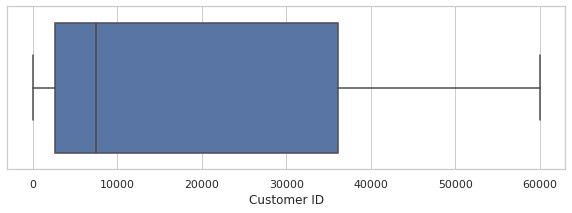

In [30]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Customer ID"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

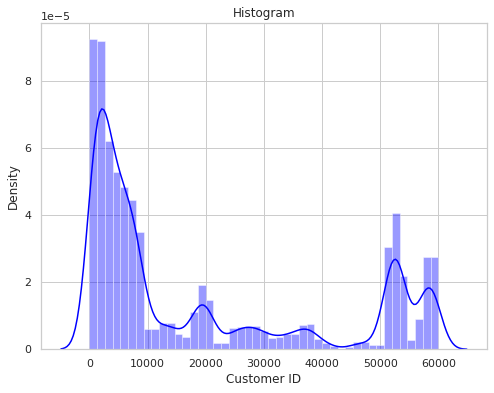

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_final["Customer ID"], bins= 45, kde= True, axlabel= "Customer ID", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Age"></a>
>Age

In [32]:
age=df_final["Age"]
age.describe()

count    359136.000000
mean         35.336911
std          12.594391
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

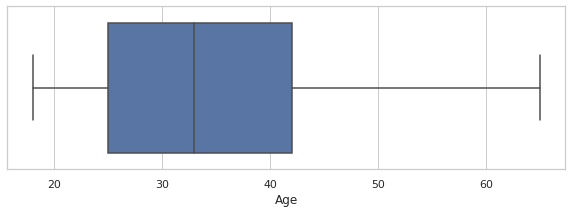

In [33]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

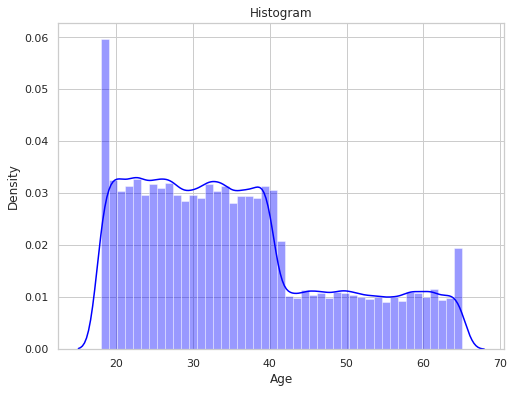

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_final["Age"], bins= 45, kde= True, axlabel= "Age", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Income_(USD/Month)"></a>
> Income (USD/Month)

In [35]:
age=df_final["Income (USD/Month)"]
age.describe()

count    359136.000000
mean      15049.007549
std        7969.581577
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

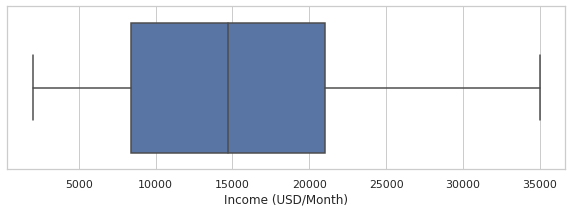

In [36]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Income (USD/Month)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

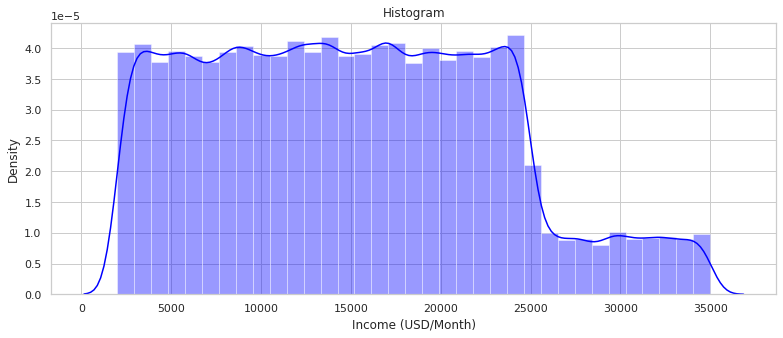

In [37]:
fig, ax = plt.subplots(figsize=(13,5))
sns.distplot(df_final["Income (USD/Month)"], bins= 35, kde= True, axlabel= "Income (USD/Month)", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Transaction_ID"></a>
>Transaction ID

In [38]:
df_final["Transaction ID"].describe()

count    3.591360e+05
mean     1.022061e+07
std      1.267205e+05
min      1.000001e+07
25%      1.011075e+07
50%      1.022091e+07
75%      1.033047e+07
max      1.044011e+07
Name: Transaction ID, dtype: float64

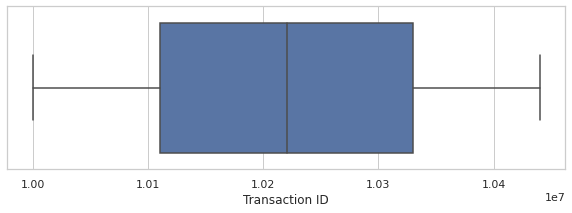

In [39]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Transaction ID"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

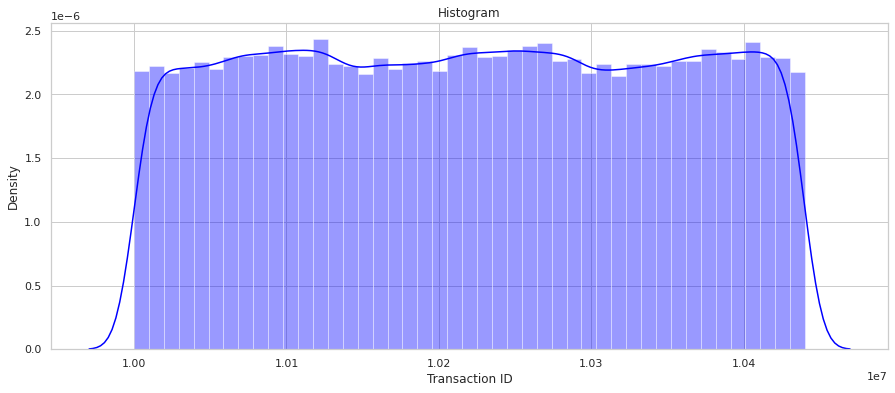

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(df_final["Transaction ID"], bins= 45, kde= True, axlabel= "Transaction ID", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Population"></a>
> Population

In [41]:
df_final["Population"].describe()

count    3.591360e+05
mean     3.132324e+06
std      3.315278e+06
min      2.489680e+05
25%      6.712380e+05
50%      1.595037e+06
75%      8.405837e+06
max      8.405837e+06
Name: Population, dtype: float64

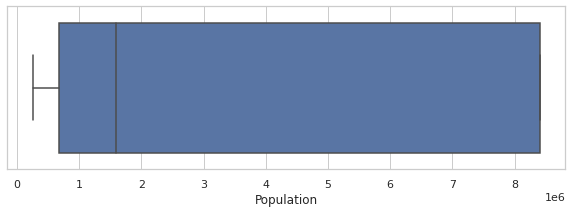

In [42]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Population"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

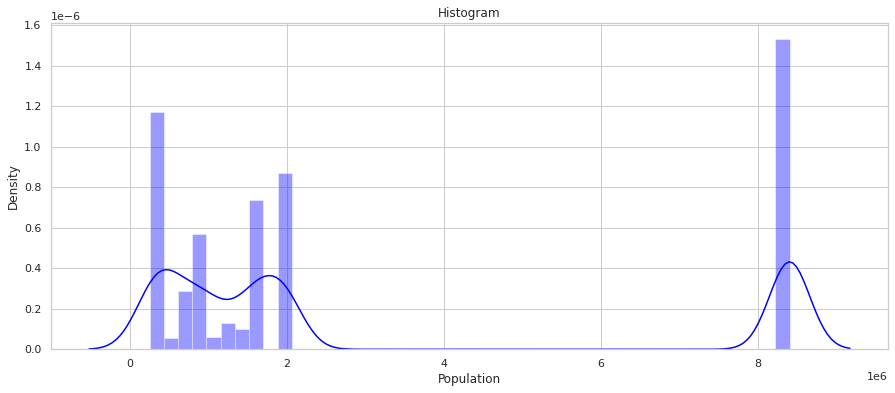

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(df_final["Population"], bins= 45, kde= True, axlabel= "Population", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Users"></a>
> Users

In [44]:
df_final["Users"].describe()

count    359136.000000
mean     158371.561999
std      100849.170524
min        3643.000000
25%       80021.000000
50%      144132.000000
75%      302149.000000
max      302149.000000
Name: Users, dtype: float64

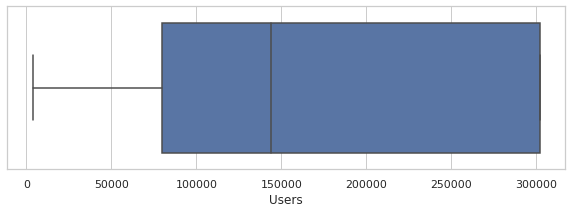

In [45]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Users"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

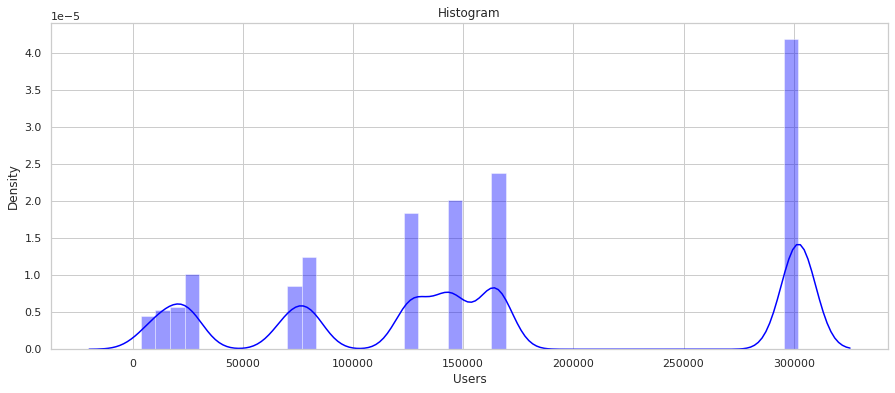

In [46]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(df_final["Users"], bins= 45, kde= True, axlabel= "Users", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Month"></a>
> Month

In [47]:
df_final["Month"].describe()

count    359136.000000
mean          7.497227
std           3.444226
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64

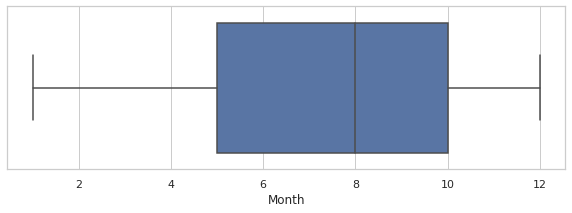

In [48]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Month"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

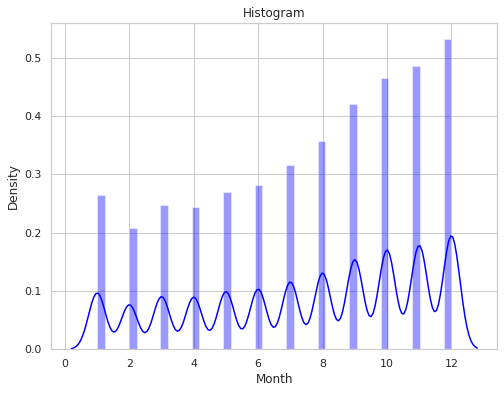

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_final["Month"], bins= 45, kde= True, axlabel= "Month", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

<a name="Year"></a>
> Year

In [50]:
df_final["Year"].describe()

count    359136.000000
mean       2017.044518
std           0.800118
min        2016.000000
25%        2016.000000
50%        2017.000000
75%        2018.000000
max        2018.000000
Name: Year, dtype: float64

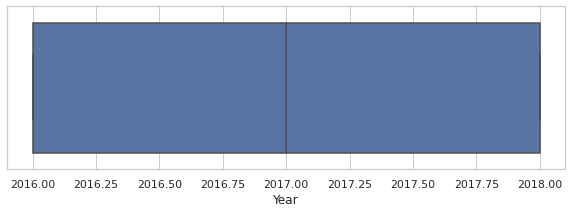

In [51]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df_final["Year"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram')

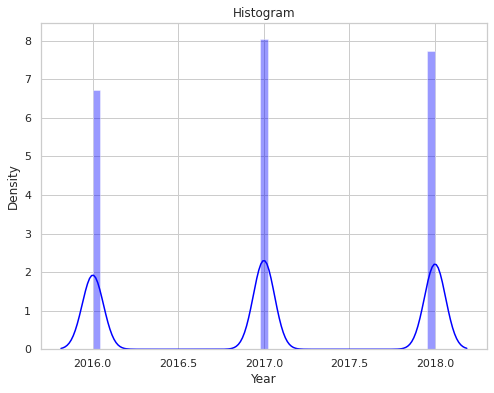

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_final["Year"], bins= 45, kde= True, axlabel= "Year", ax= ax, color='blue')
ax.set_ylabel("Density")
ax.set_title("Histogram")

#####**4.3.1.2. Continuous**

* KM Travelled        
* Price Charged       
* Cost of Trip        


--------------------  Description of KM Travelled-------------------

count    359136.000000
mean         22.567001
std          12.233641
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM Travelled, dtype: float64 

-------------------- Boxplot - KM Travelled -------------------------



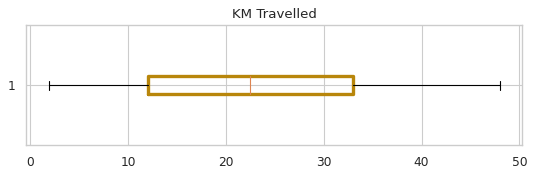



---------------------------------------- Histogram - KM Travelled -------------------------------------------



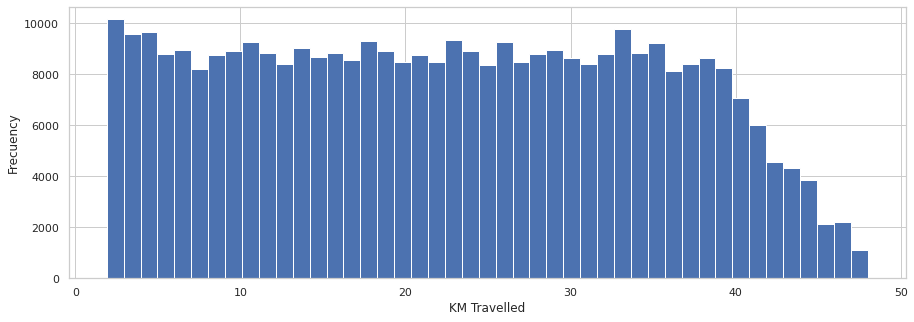



--------------------  Description of Price Charged-------------------

count    359136.000000
mean        423.475426
std         274.413015
min          15.600000
25%         206.430000
50%         386.385000
75%         583.700000
max        2048.030000
Name: Price Charged, dtype: float64 

-------------------- Boxplot - Price Charged -------------------------



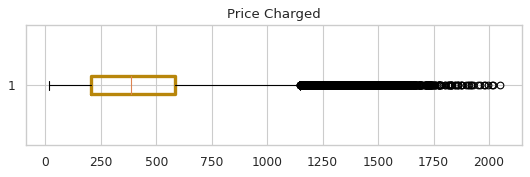



---------------------------------------- Histogram - Price Charged -------------------------------------------



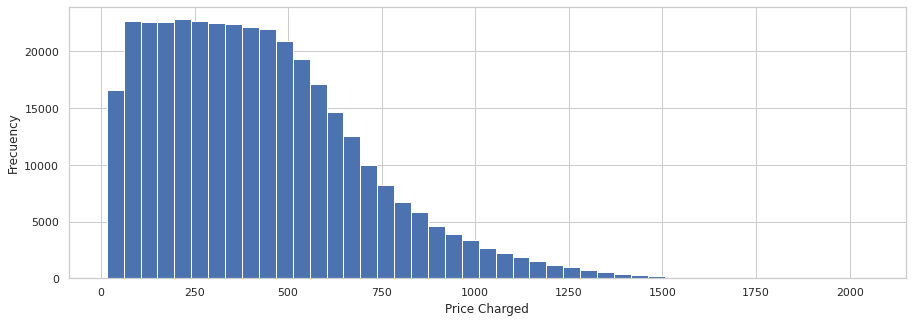



--------------------  Description of Cost of Trip-------------------

count    359136.000000
mean        286.186294
std         157.995935
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: Cost of Trip, dtype: float64 

-------------------- Boxplot - Cost of Trip -------------------------



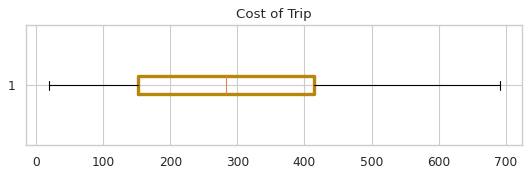



---------------------------------------- Histogram - Cost of Trip -------------------------------------------



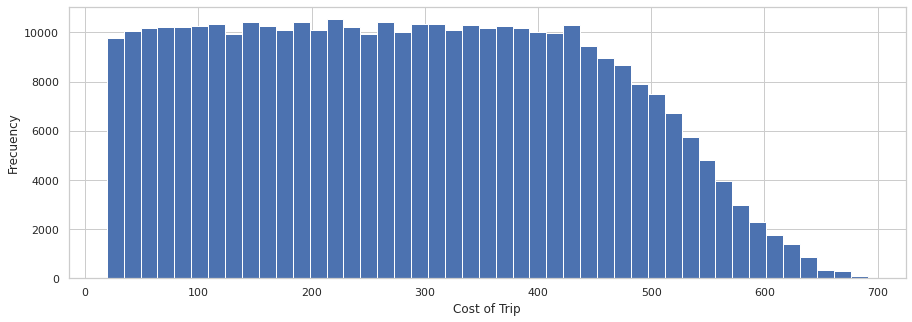

In [53]:
int_values=['KM Travelled','Price Charged', 'Cost of Trip']

df1=df_final

for i in int_values:
  df1=df_final.sort_values(i)
  print("--------------------  Description of "+i+"-------------------\n")
  print(df1[i].describe(percentiles=[0.25, 0.5, 0.75]),"\n")
  print("-------------------- Boxplot - "+i+" -------------------------\n")
  boxprops = dict(linestyle='-', linewidth=3, color='darkgoldenrod')
  plt.figure(num=1, figsize=(8, 2), dpi=80, facecolor='w', edgecolor='k')
  plt.boxplot(df1[i],boxprops=boxprops, vert=False)
  plt.title(label=i)
  plt.show()
  print("\n")
  print("---------------------------------------- Histogram - "+i+" -------------------------------------------\n")
  plt.figure(figsize=(15, 5))
  df1[i].hist(bins=45)
  plt.xlabel(i)
  plt.ylabel("Frecuency")
  plt.show()
  print("\n")

####**4.3.2. Qualitative variables**

#####**4.3.2.1. Nominal**

* [Gender](#Gender)
* [Payment_Mode](#Payment_Mode)
* [Company](#Company)
* [City](#City)
* [Name_Holiday ](#Name_Holiday)
* [Type](#Type)
* [State ](#State)

<a name="Gender"></a>
> Gender

-------------- Description: Gender-------------

count     359136
unique         2
top         Male
freq      205767
Name: Gender, dtype: object 

---------------- Pie - Gender -------------------



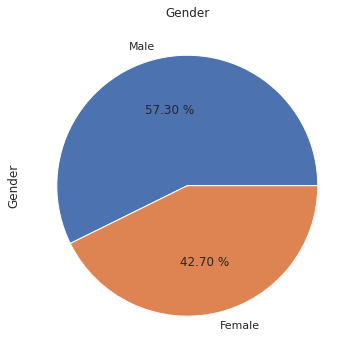

In [54]:
print("-------------- Description: Gender-------------\n")
print(df_final['Gender'].describe(), "\n")
print("---------------- Pie - Gender -------------------\n")
plot = df_final['Gender'].value_counts().plot(kind='pie', autopct='%.2f %%',figsize=(6, 6), title='Gender')


-------------------------------- Histogram - Gender -----------------------------------



Text(0.5, 1.0, 'Gender')

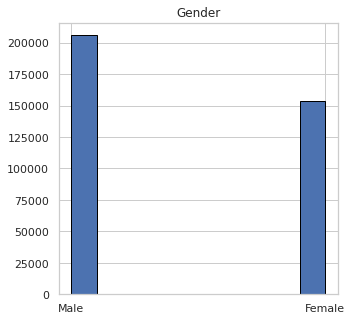

In [55]:
print("-------------------------------- Histogram - Gender -----------------------------------\n")
plt.figure(figsize=(5, 5))
plt.hist(df_final['Gender'],edgecolor='black',linewidth=1,bins=10)
plt.title(label='Gender')

<a name="Payment_Mode"></a>
> Payment_Mode

-------------- Description: Payment_Mode-------------

count     359136
unique         2
top         Card
freq      215347
Name: Payment_Mode, dtype: object 

----------------- Pie - Payment_Mode -------------------



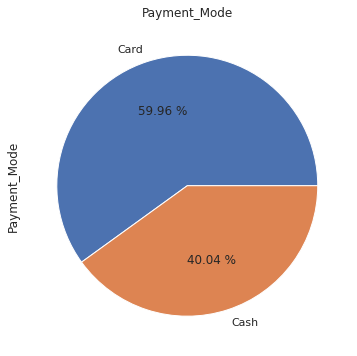

In [56]:
print("-------------- Description: Payment_Mode-------------\n")
print(df_final['Payment_Mode'].describe(), "\n")
print("----------------- Pie - Payment_Mode -------------------\n")
plot = df_final['Payment_Mode'].value_counts().plot(kind='pie', autopct='%.2f %%',figsize=(6, 6), title='Payment_Mode')

<a name="Company"></a>
> Company

-------------- Description: Company-------------

count         359136
unique             2
top       Yellow Cab
freq          274483
Name: Company, dtype: object 

---------------- Pie - Company -------------------



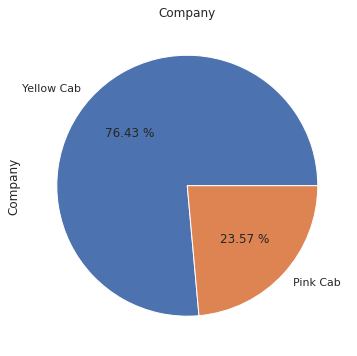

In [57]:
print("-------------- Description: Company-------------\n")
print(df_final['Company'].describe(), "\n")
print("---------------- Pie - Company -------------------\n")
plot = df_final['Company'].value_counts().plot(kind='pie', autopct='%.2f %%',figsize=(6, 6), title='Company')

<a name="City"></a>
> City

---------------- Description: City -------------------

count          359136
unique             19
top       NEW YORK NY
freq            99821
Name: City, dtype: object 

----------------- Barplot - City --------------------



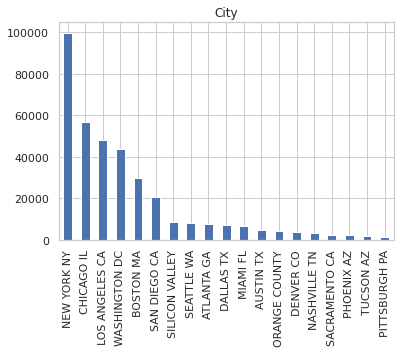

In [58]:
print("---------------- Description: City -------------------\n")
print(df_final['City'].describe(), "\n")
print("----------------- Barplot - City --------------------\n")
plot = df_final['City'].value_counts().plot(kind='bar',title='City')

<a name="Name_Holiday"></a>
> Name_Holiday

> - Analysis include 'Today is not Holiday'

Today is not Holiday                     351559
Veterans Day                               1565
Christmas Day                              1331
Thanksgiving Day                           1166
Columbus Day                                673
Labor Day                                   666
New Year Day                                610
Memorial Day                                449
Independence Day                            447
Presidents Day (Washingtons Birthday)       345
Martin Luther King Jr. Day                  325
Name: Name_Holiday, dtype: int64 

-------------- Description: 'Name_Holiday'--------------

count                   359136
unique                      11
top       Today is not Holiday
freq                    351559
Name: Name_Holiday, dtype: object 

------------------------ Barplot - Hame_Holiday ---------------------



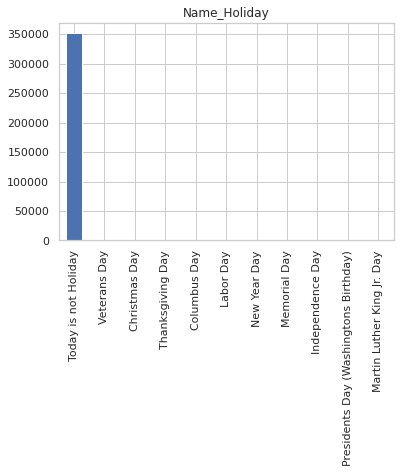

In [59]:
print(pd.value_counts(df_final['Name_Holiday']), "\n")
print("-------------- Description: 'Name_Holiday'--------------\n")
print(df_final['Name_Holiday'].describe(), "\n")
print("------------------------ Barplot - Hame_Holiday ---------------------\n")
plot = df_final['Name_Holiday'].value_counts().plot(kind='bar',title='Name_Holiday')

> - Analysis whithout 'Today is not Holiday'

Veterans Day                             1565
Christmas Day                            1331
Thanksgiving Day                         1166
Columbus Day                              673
Labor Day                                 666
New Year Day                              610
Memorial Day                              449
Independence Day                          447
Presidents Day (Washingtons Birthday)     345
Martin Luther King Jr. Day                325
Name: Name_Holiday, dtype: int64 

-------------- Description: Name_Holiday -------------

count             7577
unique              10
top       Veterans Day
freq              1565
Name: Name_Holiday, dtype: object 

------------------- Barplot -  Name_Holiday ---------------------



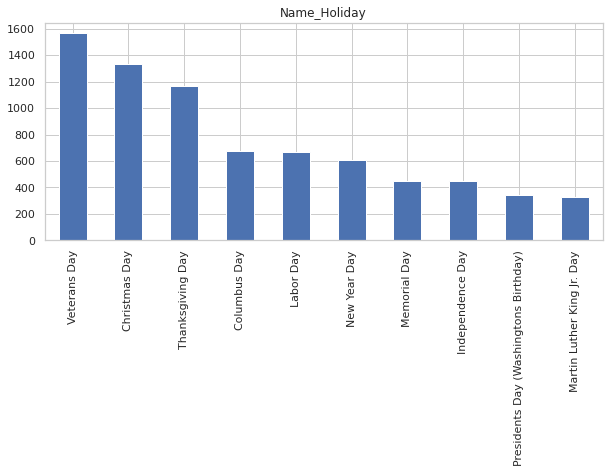

In [60]:
serie=df_final[df_final['Name_Holiday']!="Today is not Holiday"]
print(pd.value_counts(serie['Name_Holiday']), "\n")

print("-------------- Description: Name_Holiday -------------\n")
print(serie['Name_Holiday'].describe(), "\n")
print("------------------- Barplot -  Name_Holiday ---------------------\n")

plot = serie['Name_Holiday'].value_counts().plot(kind='bar',title='Name_Holiday',figsize=(10, 4))

<a name="Type"></a>
> Type

-------------- Description: Type-------------

count     359136
unique         7
top         Rain
freq      228815
Name: Type, dtype: object 

------------------------ Barplot - Type ---------------------



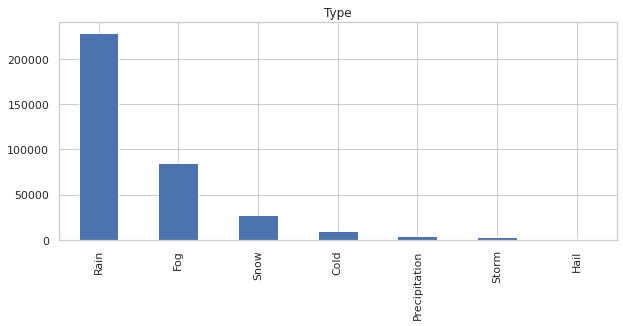

In [61]:
print("-------------- Description: Type-------------\n")
print(df_final['Type'].describe(), "\n")
print("------------------------ Barplot - Type ---------------------\n")
plot = df_final['Type'].value_counts().plot(kind='bar',title='Type',figsize=(10, 4))

<a name="State"></a>
> State

-------------- Description: State -------------

count     359136
unique        13
top           TX
freq       67631
Name: State, dtype: object 

------------------------ Barplot -  State ---------------------



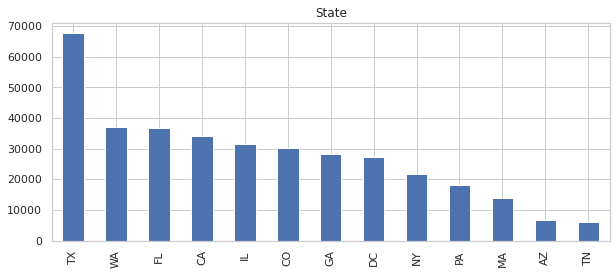

In [62]:
print("-------------- Description: State -------------\n")
print(df_final['State'].describe(), "\n")
print("------------------------ Barplot -  State ---------------------\n")
plot = df_final['State'].value_counts().plot(kind='bar',title='State',figsize=(10, 4))

#####**4.3.2.2. Ordinal**

there is not Ordinal Qualitative Variables

#####**4.3.3. All Columns**

-------------------------------------------- Histogram - Customer ID ------------------------------------------------



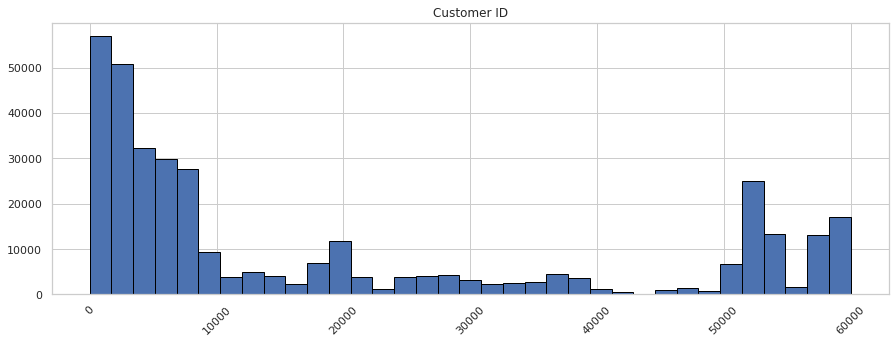




-------------------------------------------- Histogram - Gender ------------------------------------------------



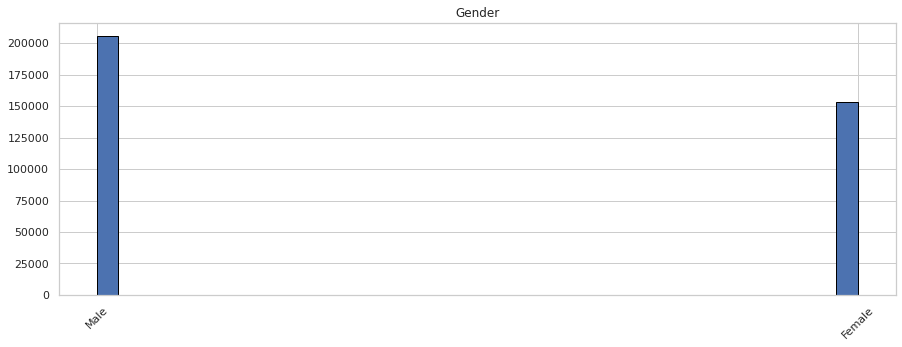




-------------------------------------------- Histogram - Age ------------------------------------------------



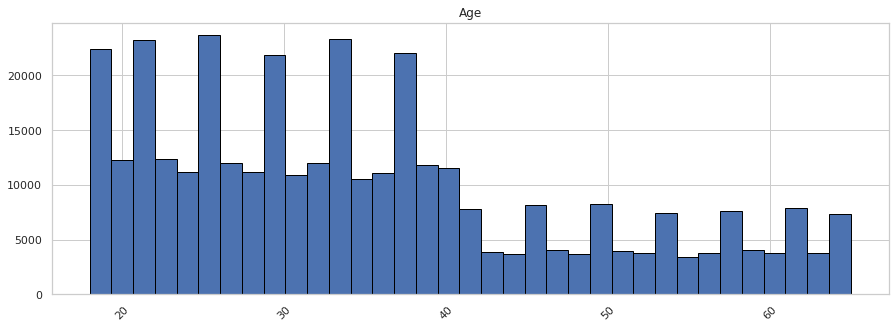




-------------------------------------------- Histogram - Income (USD/Month) ------------------------------------------------



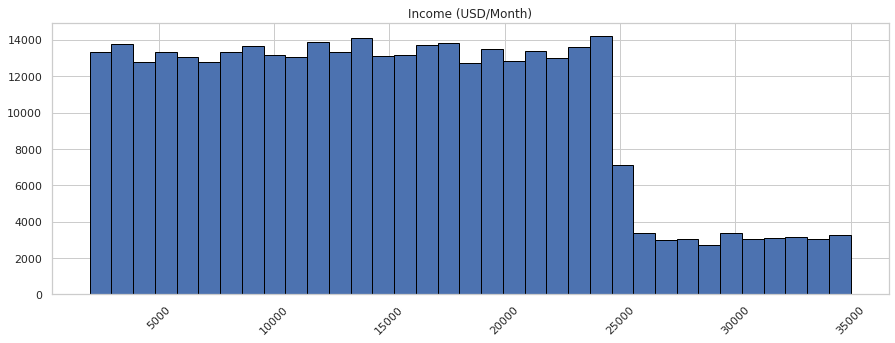




-------------------------------------------- Histogram - Transaction ID ------------------------------------------------



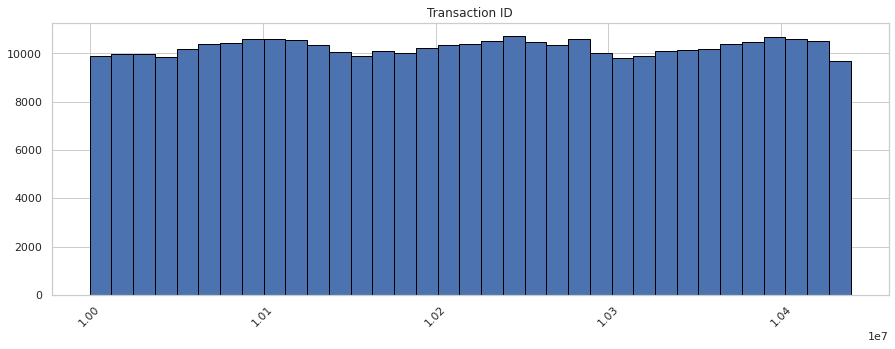




-------------------------------------------- Histogram - Payment_Mode ------------------------------------------------



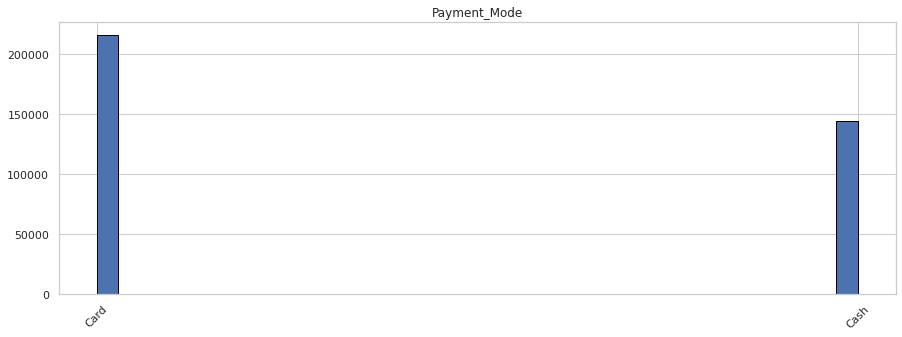




-------------------------------------------- Histogram - Company ------------------------------------------------



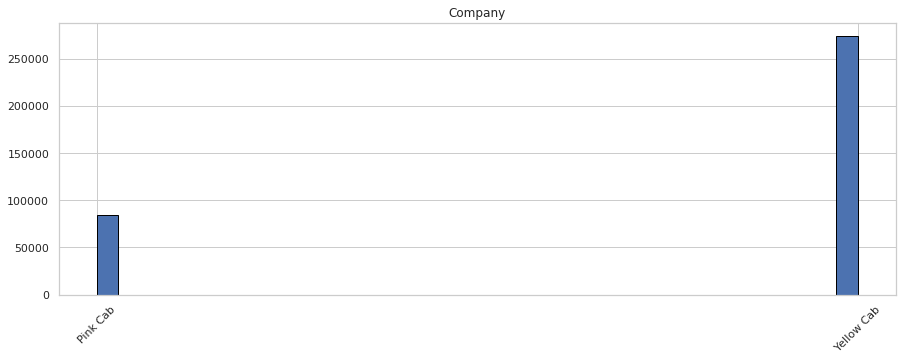




-------------------------------------------- Histogram - City ------------------------------------------------



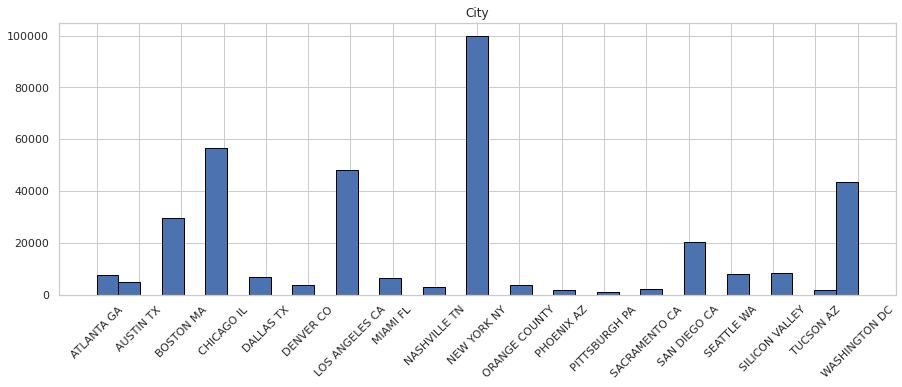




-------------------------------------------- Histogram - KM Travelled ------------------------------------------------



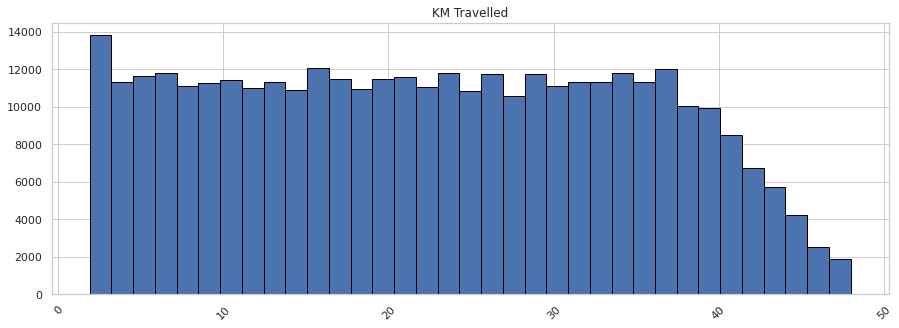




-------------------------------------------- Histogram - Price Charged ------------------------------------------------



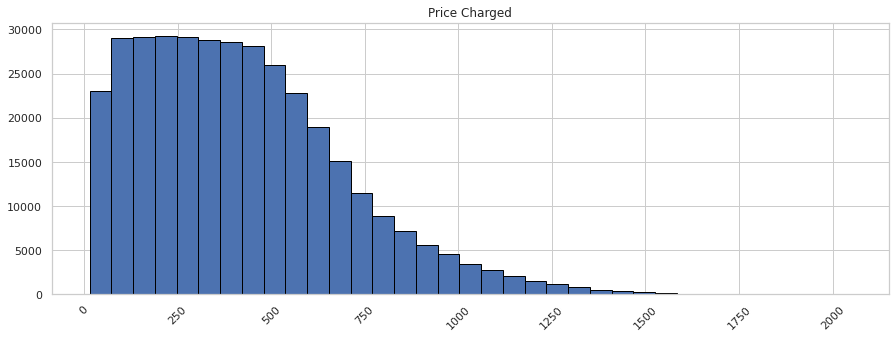




-------------------------------------------- Histogram - Cost of Trip ------------------------------------------------



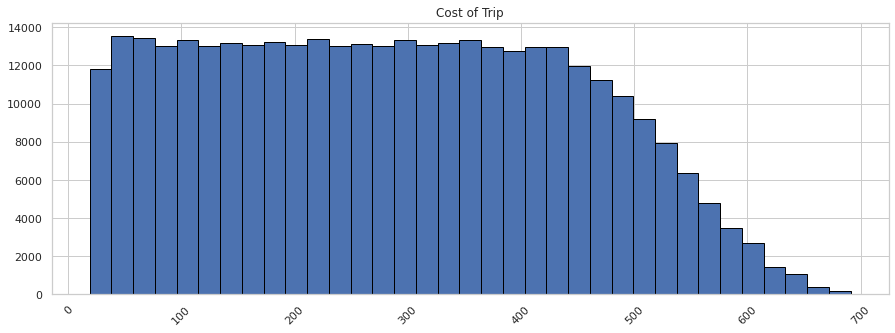




-------------------------------------------- Histogram - Population ------------------------------------------------



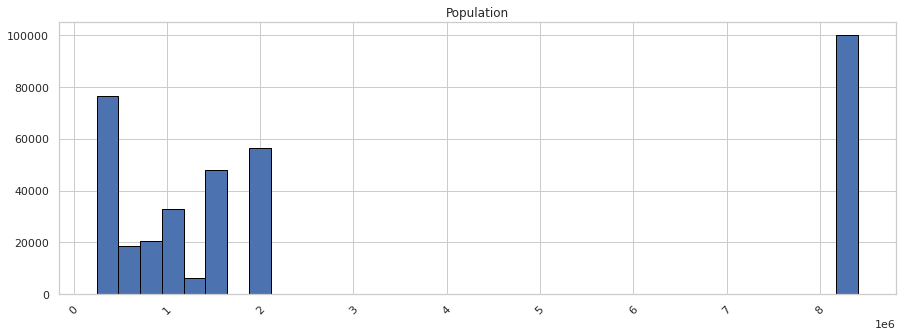




-------------------------------------------- Histogram - Users ------------------------------------------------



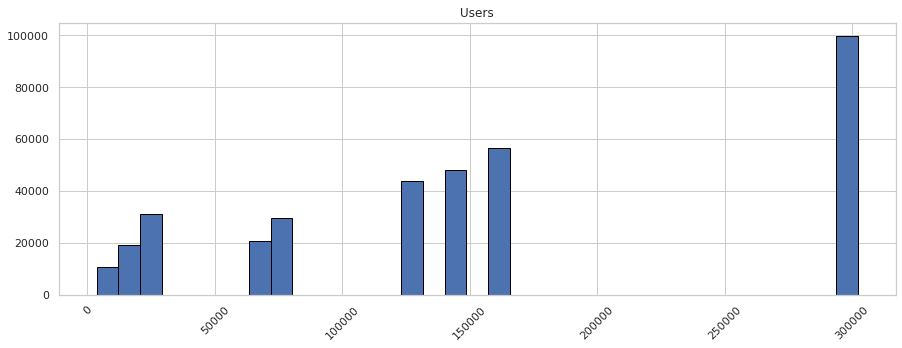




-------------------------------------------- Histogram - Name_Holiday ------------------------------------------------



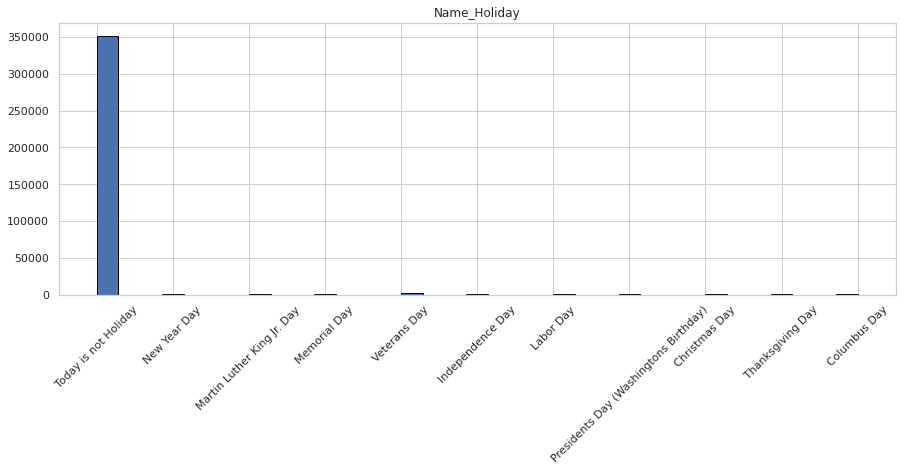




-------------------------------------------- Histogram - Type ------------------------------------------------



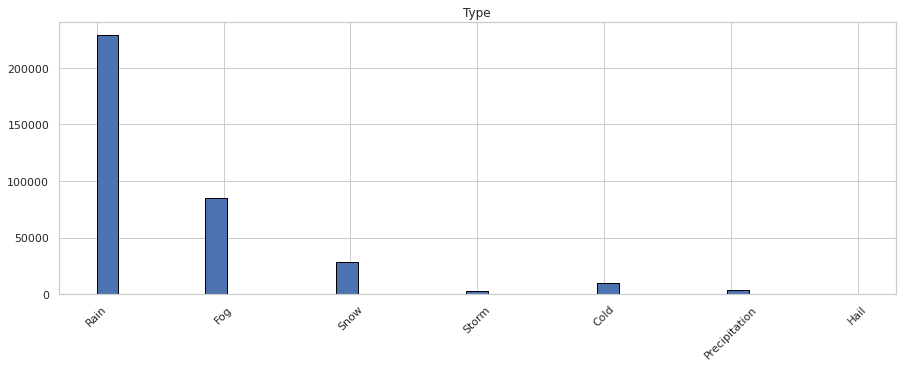




-------------------------------------------- Histogram - State ------------------------------------------------



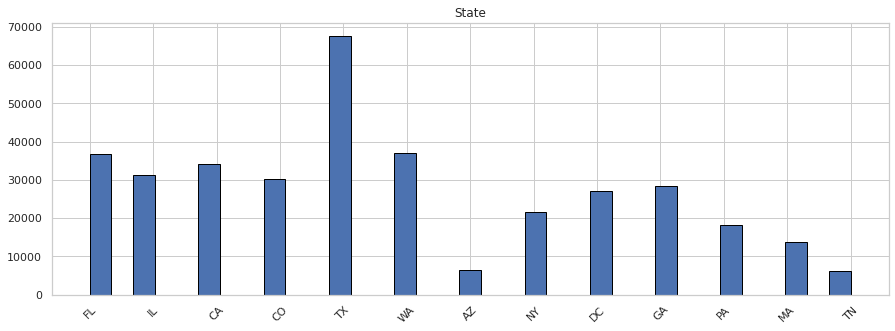




-------------------------------------------- Histogram - Month ------------------------------------------------



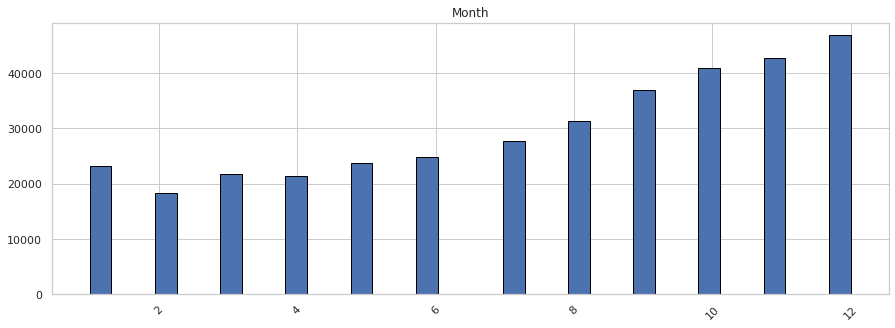




-------------------------------------------- Histogram - Year ------------------------------------------------



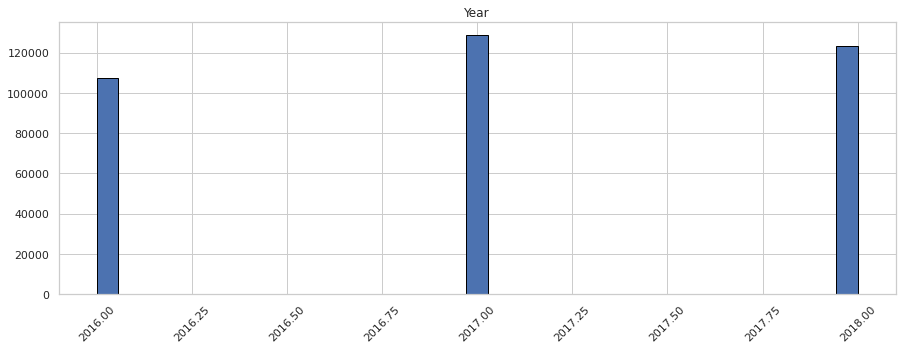

In [63]:
dec=['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Payment_Mode', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Population', 'Users', 'Name_Holiday', 'Type', 'State',
       'Month', 'Year']

for i in dec:
  print("-------------------------------------------- Histogram - "+i+" ------------------------------------------------\n")
  plt.figure(figsize=(15, 5))
  plt.hist(df_final[i],edgecolor='black',linewidth=1,bins=35)
  plt.title(label=i)
  plt.xticks(rotation=45)
  #plt.grid(True)
  plt.show()
  print('\n'*2)
 

###**4.4. Exploratory Relationship**

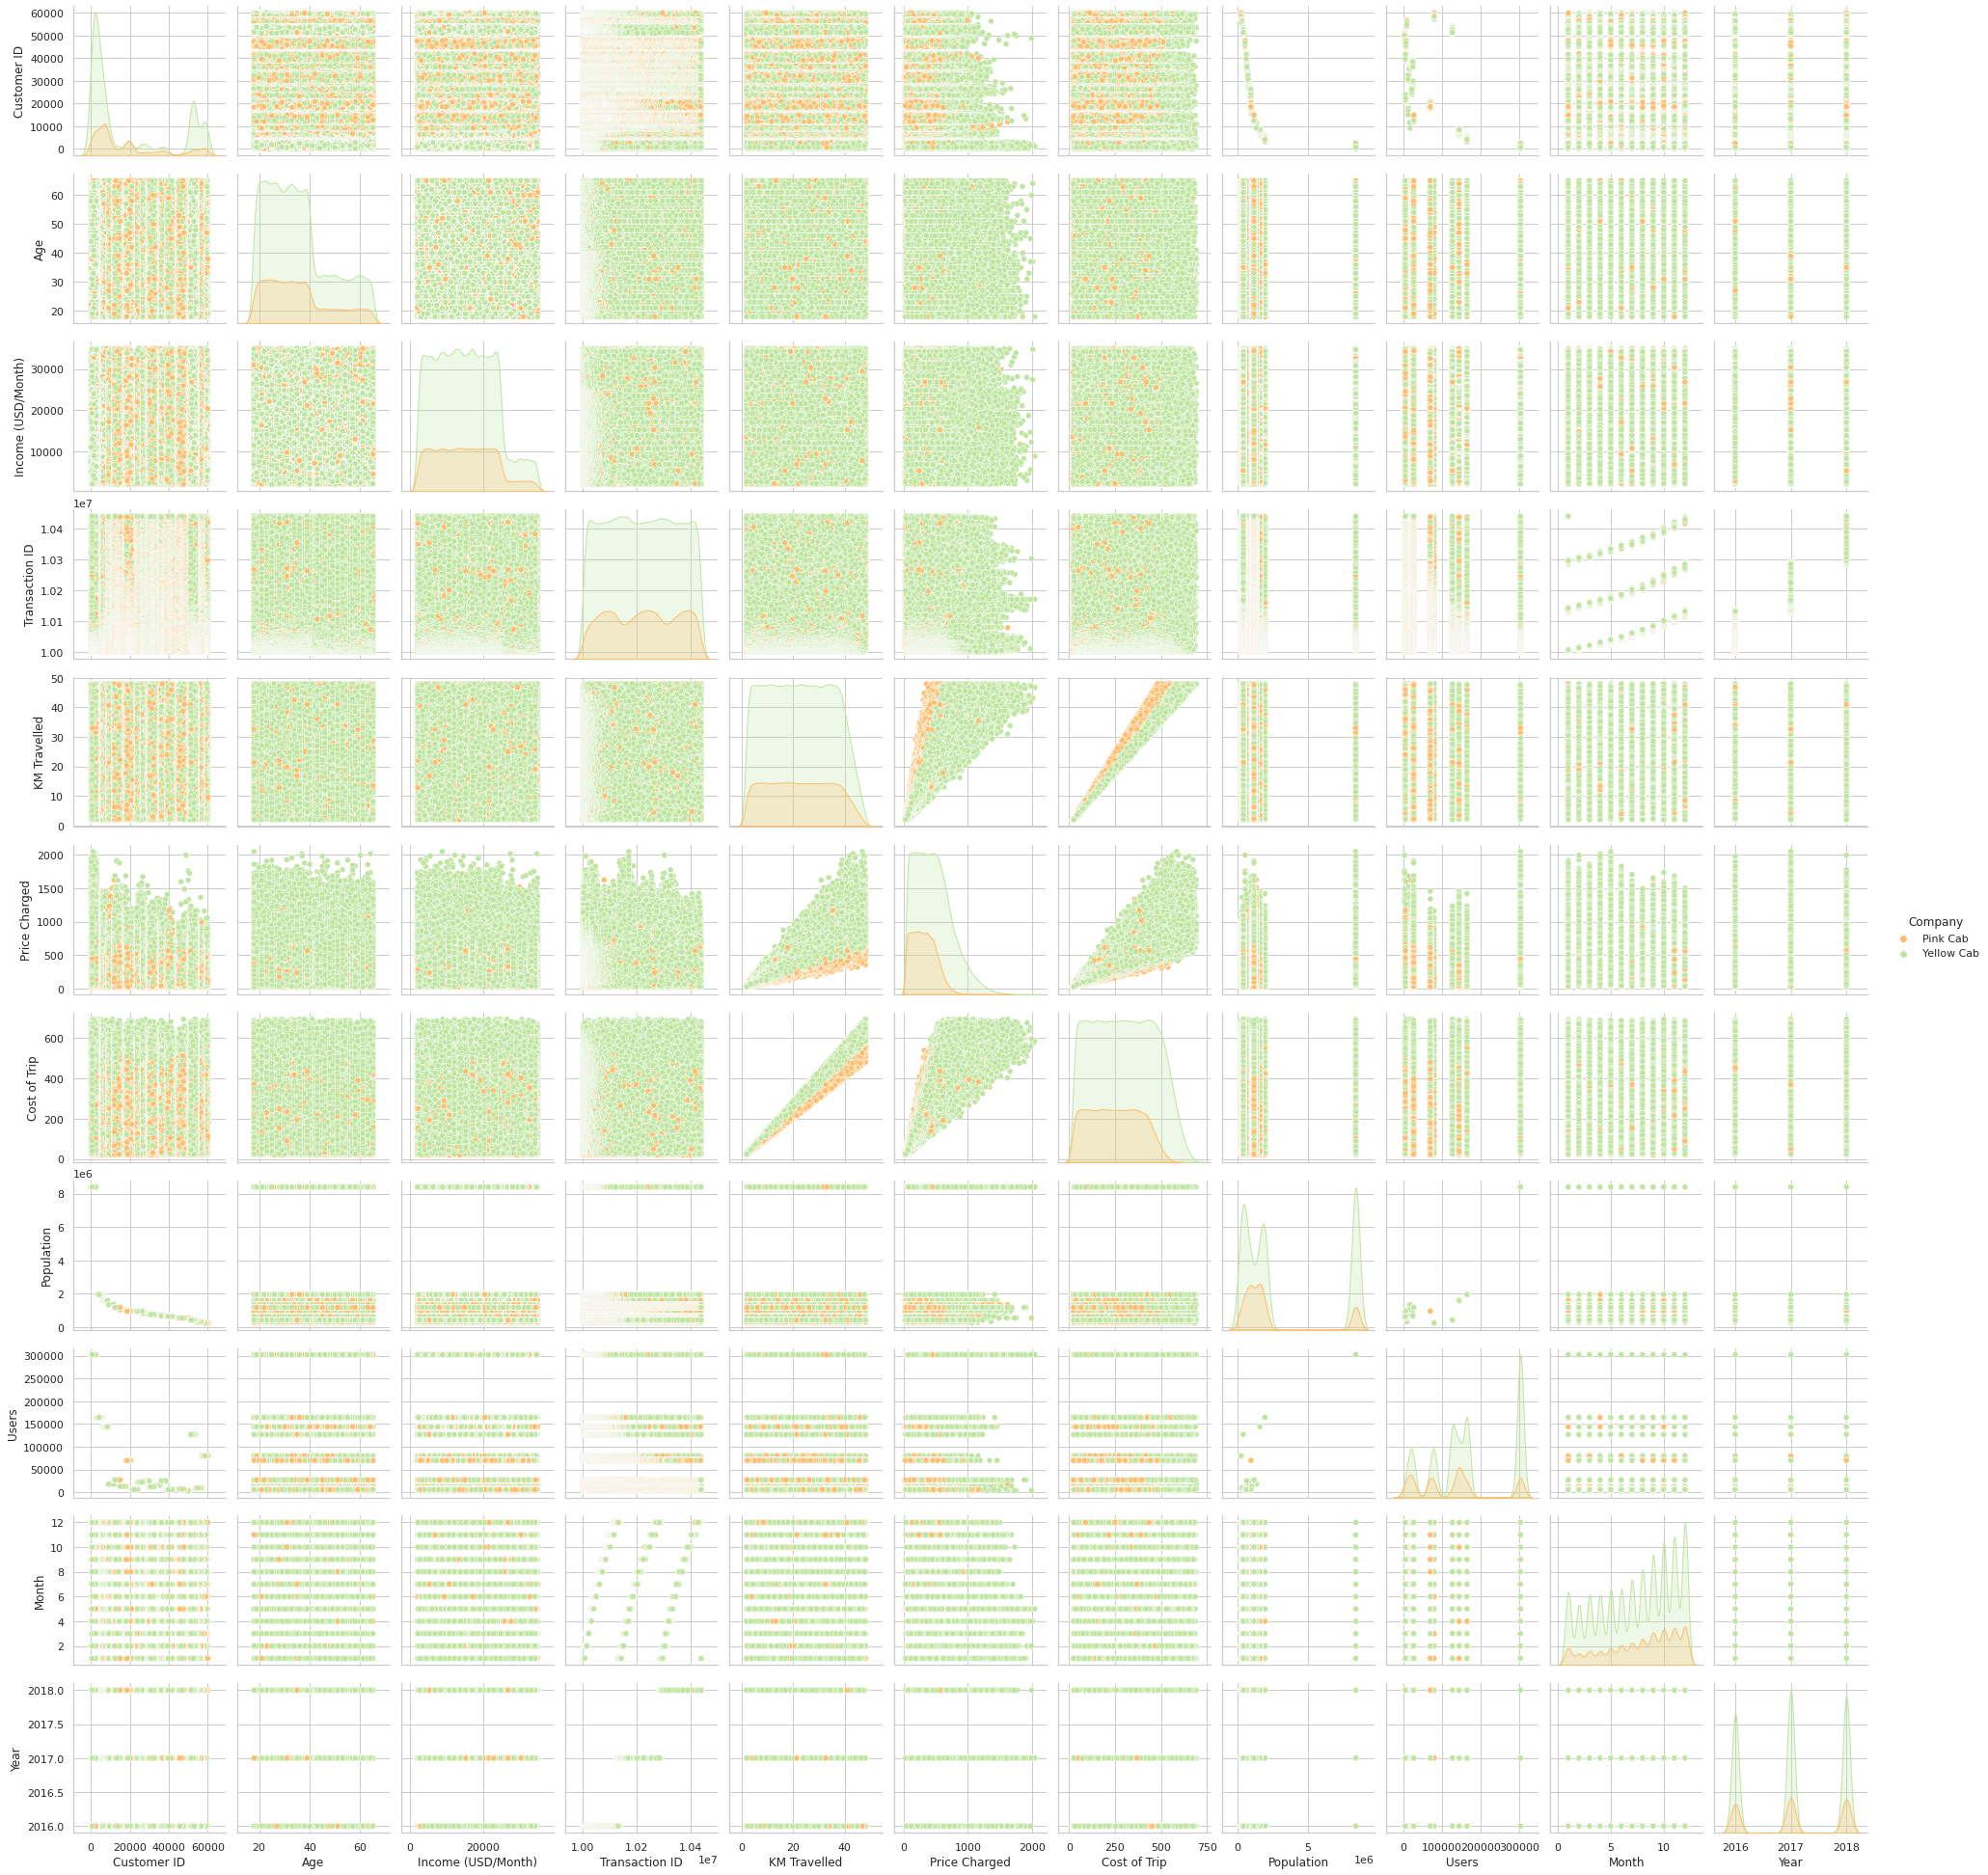

In [249]:
'sns.pairplot: Plot pairwise relationships in a dataset.'
sns.pairplot(df_final, hue='Company', palette='Spectral') 

In [64]:
'coor: Compute pairwise correlation of columns, excluding NA/null values.'
corr=df_final.corr(method='spearman')
corr

Customer ID       Age  ...     Month      Year
Customer ID            1.000000  0.002189  ... -0.052588 -0.002060
Age                    0.002189  1.000000  ... -0.001426 -0.000311
Income (USD/Month)    -0.015395  0.004831  ...  0.000545 -0.001278
Transaction ID        -0.020447 -0.000735  ...  0.294973  0.941738
KM Travelled           0.000412 -0.000142  ... -0.001642 -0.001173
Price Charged         -0.204860 -0.002009  ... -0.040985 -0.029292
Cost of Trip          -0.009656  0.000072  ... -0.007599 -0.001966
Population            -0.984695 -0.001600  ...  0.053369  0.001408
Users                 -0.860881 -0.002587  ...  0.028480 -0.000505
Month                 -0.052588 -0.001426  ...  1.000000 -0.027310
Year                  -0.002060 -0.000311  ... -0.027310  1.000000

[11 rows x 11 columns]

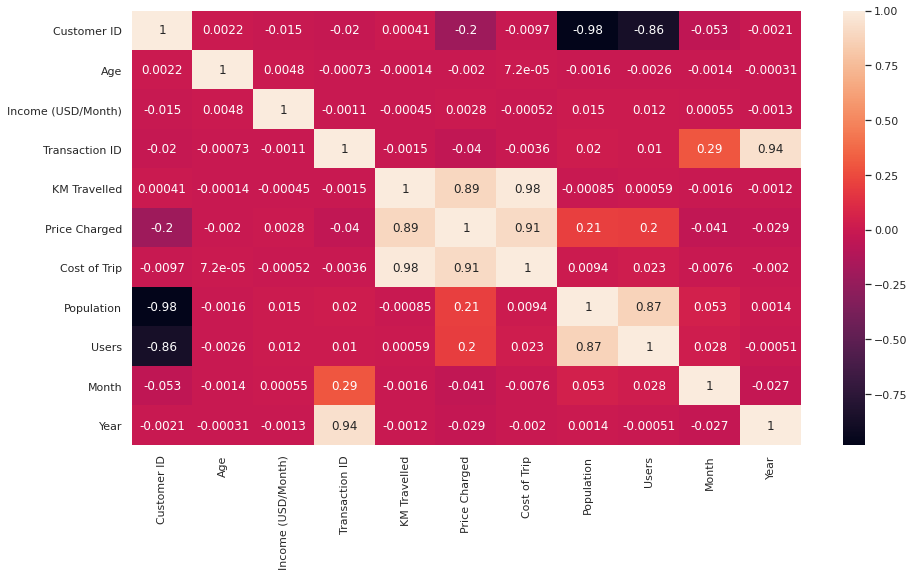

In [65]:
'sns.heatmap: Compute pairwise correlation of columns, excluding NA/null values.'
plt.figure(figsize=(15,8))                 
ax = sns.heatmap(corr, annot=True,          
                 yticklabels=corr.columns,
                 xticklabels=corr.columns,
                 annot_kws={'size': 12})

In [69]:
corr=pg.pairwise_corr(df_final, method='spearman')
corr.sort_values(by=['p-unc'])[['X','Y','n','r','p-unc']]

X                   Y       n         r          p-unc
41       Price Charged          Population  359136  0.207620   0.000000e+00
32      Transaction ID               Month  359136  0.294973   0.000000e+00
40       Price Charged        Cost of Trip  359136  0.913578   0.000000e+00
4          Customer ID       Price Charged  359136 -0.204860   0.000000e+00
33      Transaction ID                Year  359136  0.941738   0.000000e+00
6          Customer ID          Population  359136 -0.984695   0.000000e+00
7          Customer ID               Users  359136 -0.860881   0.000000e+00
42       Price Charged               Users  359136  0.198353   0.000000e+00
34        KM Travelled       Price Charged  359136  0.892944   0.000000e+00
49          Population               Users  359136  0.874262   0.000000e+00
35        KM Travelled        Cost of Trip  359136  0.984548   0.000000e+00
50          Population               Month  359136  0.053369  9.012516e-225
8          Customer ID               Month  359136 -0.052588  2.759688e-218
43       Price Charged               Month  359136 -0.040985  2.519852e-133
28      Transaction ID       Price Charged  359136 -0.040323  4.156114e-129
44       Price Charged                Year  359136 -0.029292   5.201454e-69
52               Users               Month  359136  0.028480   2.443174e-65
54               Month                Year  359136 -0.027310   3.178788e-60
46        Cost of Trip               Users  359136  0.023465   6.312533e-45
2          Customer ID      Transaction ID  359136 -0.020447   1.581269e-34
30      Transaction ID          Population  359136  0.020099   2.037774e-33
1          Customer ID  Income (USD/Month)  359136 -0.015395   2.794060e-20
23  Income (USD/Month)          Population  359136  0.014991   2.609836e-19
24  Income (USD/Month)               Users  359136  0.012359   1.292104e-13
31      Transaction ID               Users  359136  0.010070   1.591989e-09
5          Customer ID        Cost of Trip  359136 -0.009656   7.176682e-09
45        Cost of Trip          Population  359136  0.009403   1.750443e-08
47        Cost of Trip               Month  359136 -0.007599   5.262260e-06
10                 Age  Income (USD/Month)  359136  0.004831   3.788951e-03
29      Transaction ID        Cost of Trip  359136 -0.003595   3.122204e-02
21  Income (USD/Month)       Price Charged  359136  0.002834   8.939784e-02
16                 Age               Users  359136 -0.002587   1.210938e-01
0          Customer ID                 Age  359136  0.002189   1.895299e-01
9          Customer ID                Year  359136 -0.002060   2.170867e-01
13                 Age       Price Charged  359136 -0.002009   2.285161e-01
48        Cost of Trip                Year  359136 -0.001966   2.386621e-01
38        KM Travelled               Month  359136 -0.001642   3.252531e-01
15                 Age          Population  359136 -0.001600   3.376033e-01
27      Transaction ID        KM Travelled  359136 -0.001514   3.643798e-01
17                 Age               Month  359136 -0.001426   3.929369e-01
51          Population                Year  359136  0.001408   3.986533e-01
26  Income (USD/Month)                Year  359136 -0.001278   4.437845e-01
39        KM Travelled                Year  359136 -0.001173   4.821668e-01
19  Income (USD/Month)      Transaction ID  359136 -0.001149   4.909108e-01
36        KM Travelled          Population  359136 -0.000846   6.120075e-01
11                 Age      Transaction ID  359136 -0.000735   6.597101e-01
37        KM Travelled               Users  359136  0.000594   7.217506e-01
25  Income (USD/Month)               Month  359136  0.000545   7.439158e-01
22  Income (USD/Month)        Cost of Trip  359136 -0.000522   7.542265e-01
53               Users                Year  359136 -0.000505   7.621501e-01
20  Income (USD/Month)        KM Travelled  359136 -0.000454   7.853622e-01
3          Customer ID        KM Travelled  359136  0.000412   8.0476

In [70]:
'copy: Make a copy of this object’s indices and data.'
df_group=df_final.copy()
df_group

Customer ID  Gender  Age  Income (USD/Month)  ...  Type State Month  Year
0             29290    Male   28               10813  ...  Rain    FL     1  2016
1             29290    Male   28               10813  ...  Rain    IL     7  2018
2             29290    Male   28               10813  ...   Fog    CA    11  2018
3             27703    Male   27                9237  ...  Rain    CA     1  2016
4             27703    Male   27                9237  ...  Snow    CO     4  2018
...             ...     ...  ...                 ...  ...   ...   ...   ...   ...
359387        51406  Female   29                6829  ...  Snow    CA     3  2018
359388        51406  Female   29                6829  ...   Fog    WA     4  2018
359389        51406  Female   29                6829  ...  Rain    NY     7  2018
359390        51406  Female   29                6829  ...   Fog    IL     8  2018
359391        51406  Female   29                6829  ...   Fog    TX     8  2018

[359136 rows x 18 columns]

* [format](https://www.edureka.co/blog/format-function-in-python/): is technique of the string category permits you to try and do variable substitutions and data formatting
* [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html): Apply a function along an axis of the DataFrame.
* [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html): Cast a pandas object to a specified dtype dtype.

In [85]:
df_group['Price Charged']=df_group['Price Charged'].apply(lambda x : '{:0.3f}'.format(x)).astype('float')   #change result with scientific notation to float result
df_group['Cost of Trip']=df_group['Cost of Trip'].apply(lambda x : '{:0.3f}'.format(x)).astype('float')     #change result with scientific notation to float result

In [94]:
df_group['Profit']=df_group['Price Charged']-df_group['Cost of Trip']
df_group['Profit']=df_group['Profit'].apply(lambda x : '{:0.3f}'.format(x)).astype('float')   #change result with scientific notation to float result

####**4.4.1. Customer ID**

In [73]:
graph1=df_group.groupby(['Month','Company'])[['Customer ID']].count().unstack()
graph1.columns = graph1.columns.droplevel()
print(graph1)

Company  Pink Cab  Yellow Cab
Month                        
1            5057       18117
2            3375       14932
3            4223       17423
4            4083       17351
5            4960       18741
6            5877       18836
7            6590       21086
8            7739       23584
9            9658       27201
10          10576       30276
11          11005       31695
12          11510       35241


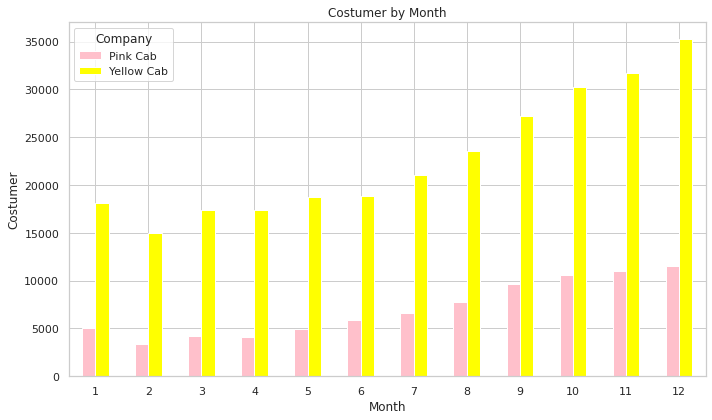

In [74]:
graph1.plot(kind="bar", figsize=(10,6), color=['pink','yellow'])
plt.title(label='Costumer by Month')
plt.ylabel('Costumer')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [75]:
graph2=df_group.groupby(['Company','Year'])[['Customer ID']].count()
print(graph2)


                 Customer ID
Company    Year             
Pink Cab   2016        25080
           2017        30321
           2018        29252
Yellow Cab 2016        82239
           2017        98189
           2018        94055


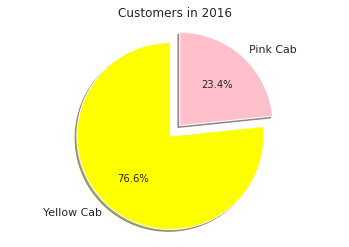

In [76]:
labels='Yellow Cab','Pink Cab'
list1=[graph2['Customer ID'].iloc[3],graph2['Customer ID'].iloc[0]]
fig1, ax1 = plt.subplots()
explode = (0.15,0)
ax1.pie(list1 ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=['yellow','pink'])
ax1.axis('equal')
plt.title('Customers in 2016')
plt.show()

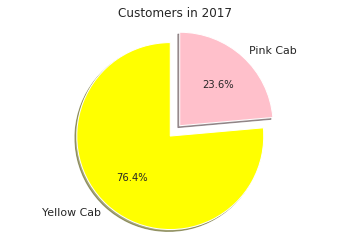

In [77]:
labels='Yellow Cab','Pink Cab'
list2=[graph2['Customer ID'].iloc[4],graph2['Customer ID'].iloc[1]]
fig1, ax1 = plt.subplots()
explode = (0.15,0)
ax1.pie(list2 ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=['yellow','pink'])
ax1.axis('equal')
plt.title('Customers in 2017')
plt.show()

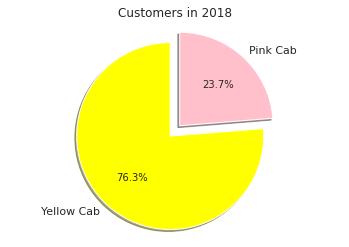

In [78]:
labels='Yellow Cab','Pink Cab'
list3=[graph2['Customer ID'].iloc[5],graph2['Customer ID'].iloc[2]]
fig12, ax12 = plt.subplots()
explode = (0.15,0)
ax12.pie(list3 ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=['yellow','pink'])
ax12.axis('equal')
plt.title('Customers in 2018')
plt.show()

In [177]:
graph3=df_group.groupby(['Year','Payment_Mode'])[['Customer ID']].count().unstack()
print(graph3)
graph3.columns = graph3.columns.droplevel()

             Customer ID       
Payment_Mode        Card   Cash
Year                           
2016               64339  42980
2017               76963  51547
2018               74045  49262


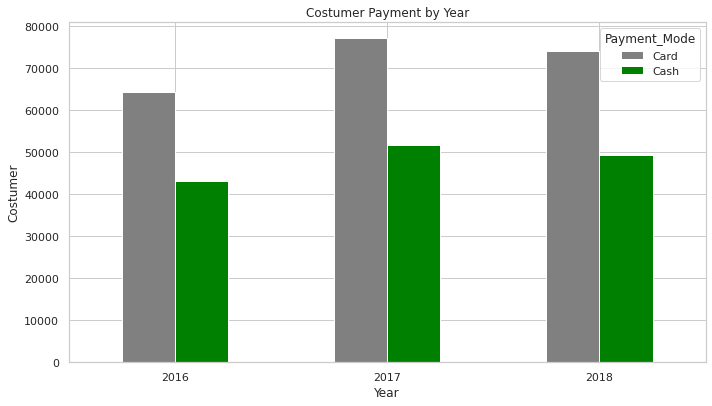

In [178]:
graph3.plot(kind="bar", figsize=(10,6), color=['grey','green'])
plt.title(label='Costumer Payment by Year')
plt.ylabel('Costumer')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

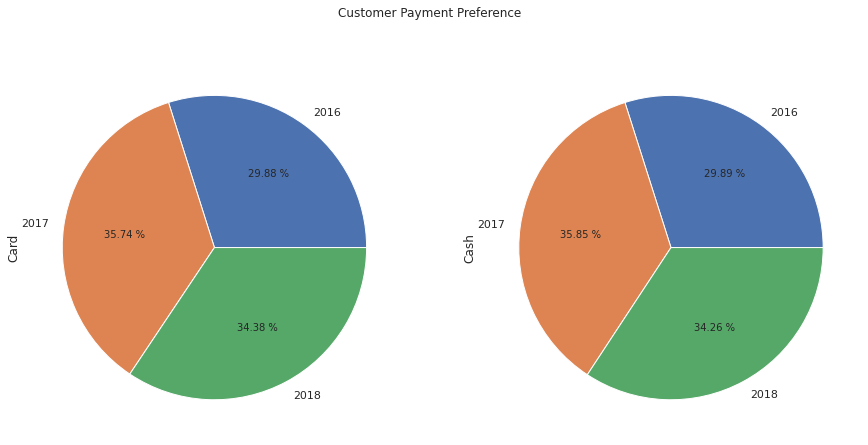

In [179]:
plot = graph3.plot(kind='pie', autopct='%.2f %%',figsize=(15, 7), title='Customer Payment Preference',subplots=True,legend='')


Payment_Mode
Card    193624
Cash    129187
Name: Payment_Mode, dtype: int64




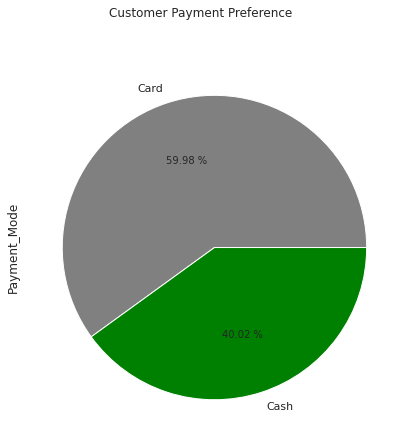

In [183]:
graph3a=df_group[df_group['Price Charged']>100].groupby('Payment_Mode')['Payment_Mode'].count()
print(graph3a)
print('\n')
plot = graph3a.plot(kind='pie', autopct='%.2f %%',figsize=(15, 7), title='Customer Payment Preference',subplots=True,legend='',colors=['grey','green'])

Payment_Mode
Card    21718
Cash    14600
Name: Payment_Mode, dtype: int64


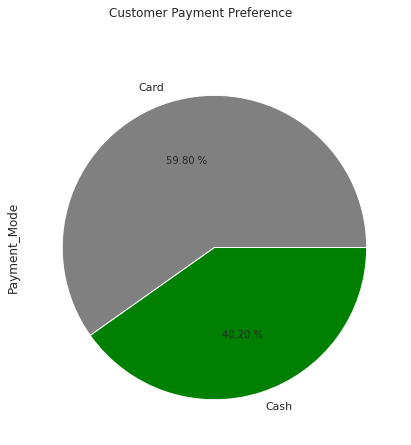

In [182]:
graph3b=df_group[df_group['Price Charged']<100].groupby('Payment_Mode')['Payment_Mode'].count()
print(graph3b)
plot = graph3b.plot(kind='pie', autopct='%.2f %%',figsize=(15, 7), title='Customer Payment Preference',subplots=True,legend='',colors=['grey','green'])

In [97]:
graph4=df_group.groupby(['Company']).agg({ 'Profit':'sum','Transaction ID':'count'})
graph4['Profit']=graph4['Profit'].apply(lambda x: '{:0.2f}'.format(x)).astype('float')
graph4.rename(columns={'Transaction ID':'Total Ride'}, inplace=True)
graph4['Profit per Ride']=graph4['Profit'] / graph4['Total Ride']
graph4

Profit  Total Ride  Profit per Ride
Company                                             
Pink Cab     5302884.17       84653        62.642602
Yellow Cab  44002585.67      274483       160.310787

####**4.4.2. Gender**

In [98]:
graph5=df_group.groupby(['Company','Gender'])['Profit'].mean()
graph5

Company     Gender
Pink Cab    Female     62.177396
            Male       63.011740
Yellow Cab  Female    156.346088
            Male      163.209069
Name: Profit, dtype: float64

In [99]:
graph6=df_group.groupby(['Company','Gender'])['Profit'].agg(['sum'])
graph6['sum']=graph6['sum'].apply(lambda x: '{:0.2f}'.format(x))                #change result with scientific notation to float result
graph6

sum
Company    Gender             
Pink Cab   Female   2328730.02
           Male     2974154.14
Yellow Cab Female  18123013.17
           Male    25879572.50

In [100]:
graph7=df_group.groupby(['Company','Gender'])['Price Charged'].mean()
graph7

Company     Gender
Pink Cab    Female    310.629679
            Male      310.899263
Yellow Cab  Female    454.594639
            Male      460.890474
Name: Price Charged, dtype: float64

In [101]:
graph8=df_group.groupby(['Company','Gender'])['Price Charged'].agg(['sum'])
graph8['sum']=graph8['sum'].apply(lambda x: '{:0.2f}'.format(x))                #change result with scientific notation to float result
graph8

sum
Company    Gender             
Pink Cab   Female  11634013.36
           Male    14674445.23
Yellow Cab Female  52694792.22
           Male    73082019.79

In [102]:
graph9=df_group.groupby(['Company','Gender'])['Cost of Trip'].mean()
graph9

Company     Gender
Pink Cab    Female    248.452283
            Male      247.887523
Yellow Cab  Female    298.248551
            Male      297.681405
Name: Cost of Trip, dtype: float64

In [104]:
graph10=df_group.groupby(['Company','Gender'])['Cost of Trip'].agg(['sum'])
graph10['sum']=graph10['sum'].apply(lambda x: '{:0.2f}'.format(x))              #change result with scientific notation to float result
graph10

sum
Company    Gender             
Pink Cab   Female   9305283.34
           Male    11700291.09
Yellow Cab Female  34571779.05
           Male    47202447.29

In [105]:
graph11=df_group.groupby(['Company','Gender'])['Transaction ID'].count()
graph11

Company     Gender
Pink Cab    Female     37453
            Male       47200
Yellow Cab  Female    115916
            Male      158567
Name: Transaction ID, dtype: int64

####**4.4.3. Year**

In [106]:
graph12=df_group.groupby(['Company','Year'])['Profit'].mean()
graph12

Company     Year
Pink Cab    2016     68.321819
            2017     67.070839
            2018     53.183305
Yellow Cab  2016    169.347822
            2017    168.817057
            2018    143.528916
Name: Profit, dtype: float64

In [107]:
graph13=df_group.groupby(['Company','Year'])['Price Charged'].mean()
graph13

Company     Year
Pink Cab    2016    315.330113
            2017    315.907442
            2018    301.563989
Yellow Cab  2016    467.918301
            2017    466.639950
            2018    440.984199
Name: Price Charged, dtype: float64

In [108]:
graph14=df_group.groupby(['Company','Year'])['Cost of Trip'].mean()
graph14

Company     Year
Pink Cab    2016    247.008294
            2017    248.836603
            2018    248.380685
Yellow Cab  2016    298.570480
            2017    297.822893
            2018    297.455283
Name: Cost of Trip, dtype: float64

In [109]:
graph15=df_group.groupby(['Company','Year'])['Transaction ID'].count()
graph15

Company     Year
Pink Cab    2016    25080
            2017    30321
            2018    29252
Yellow Cab  2016    82239
            2017    98189
            2018    94055
Name: Transaction ID, dtype: int64

####**4.4.4. KM Travelled**

In [110]:
graph16=df_group.groupby(['Company','Year'])['KM Travelled'].mean()
graph16

Company     Year
Pink Cab    2016    22.468488
            2017    22.618763
            2018    22.574841
Yellow Cab  2016    22.616742
            2017    22.557303
            2018    22.540776
Name: KM Travelled, dtype: float64

In [111]:
graph17=df_group.groupby(['Company','Month'])['KM Travelled'].count()
graph17

Company     Month
Pink Cab    1         5057
            2         3375
            3         4223
            4         4083
            5         4960
            6         5877
            7         6590
            8         7739
            9         9658
            10       10576
            11       11005
            12       11510
Yellow Cab  1        18117
            2        14932
            3        17423
            4        17351
            5        18741
            6        18836
            7        21086
            8        23584
            9        27201
            10       30276
            11       31695
            12       35241
Name: KM Travelled, dtype: int64

In [112]:
graph18=df_group.groupby(['Company'])['KM Travelled'].count()
graph18

Company
Pink Cab       84653
Yellow Cab    274483
Name: KM Travelled, dtype: int64

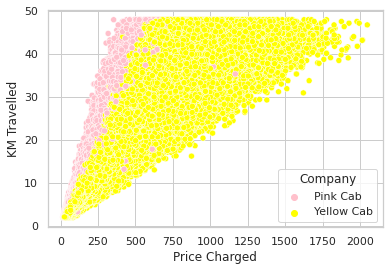

In [ ]:
sns.scatterplot(x='Price Charged',y='KM Travelled',data=df_group, hue='Company', palette=['pink','yellow'])

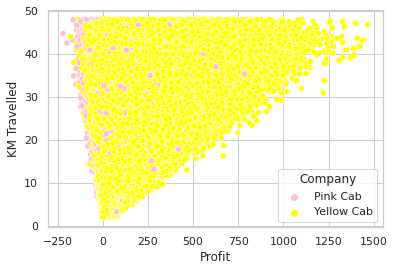

In [ ]:
sns.scatterplot(x='Profit',y='KM Travelled',data=df_group, hue='Company', palette=['pink','yellow'])

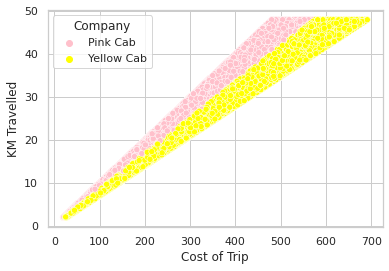

In [ ]:
sns.scatterplot(x='Cost of Trip',y='KM Travelled',data=df_group, hue='Company', palette=['pink','yellow'])

####**4.4.5. City**

In [250]:
graph19=df_group[df_group['Company']=='Pink Cab'].groupby(['City'])['KM Travelled'].count().sort_values(ascending=False)
graph19

City
LOS ANGELES CA    19854
NEW YORK NY       13958
SAN DIEGO CA      10665
CHICAGO IL         9354
BOSTON MA          5183
SILICON VALLEY     3794
WASHINGTON DC      3691
SEATTLE WA         2728
MIAMI FL           2000
AUSTIN TX          1865
NASHVILLE TN       1841
ATLANTA GA         1760
ORANGE COUNTY      1511
DENVER CO          1393
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          862
TUCSON AZ           798
PITTSBURGH PA       682
Name: KM Travelled, dtype: int64

In [114]:
graph20=df_group[df_group['Company']=='Yellow Cab'].groupby(['City'])['KM Travelled'].count()
graph20

City
ATLANTA GA         5792
AUSTIN TX          3023
BOSTON MA         24493
CHICAGO IL        47226
DALLAS TX          5630
DENVER CO          2430
LOS ANGELES CA    28146
MIAMI FL           4448
NASHVILLE TN       1169
NEW YORK NY       85863
ORANGE COUNTY      2466
PHOENIX AZ         1199
PITTSBURGH PA       630
SACRAMENTO CA      1031
SAN DIEGO CA       9812
SEATTLE WA         5261
SILICON VALLEY     4718
TUCSON AZ          1130
WASHINGTON DC     40016
Name: KM Travelled, dtype: int64

In [115]:
graph21=df_group.groupby(['City'])['Transaction ID'].count().sort_values(ascending=False)
graph21

City
NEW YORK NY       99821
CHICAGO IL        56580
LOS ANGELES CA    48000
WASHINGTON DC     43707
BOSTON MA         29676
SAN DIEGO CA      20477
SILICON VALLEY     8512
SEATTLE WA         7989
ATLANTA GA         7552
DALLAS TX          7010
MIAMI FL           6448
AUSTIN TX          4888
ORANGE COUNTY      3977
DENVER CO          3823
NASHVILLE TN       3010
SACRAMENTO CA      2365
PHOENIX AZ         2061
TUCSON AZ          1928
PITTSBURGH PA      1312
Name: Transaction ID, dtype: int64

In [117]:
graph22=df_group.groupby(['Company','City']).agg({"KM Travelled":'sum',"Cost of Trip":'sum'})
graph22.rename(columns={"KM Travelled":'Total KM',"Cost of Trip":'Total Cost'},inplace=True)
graph22['Total Cost']=graph22['Total Cost'].apply(lambda x: '{:.2f}'.format(x))
graph22

Total KM   Total Cost
Company    City                                   
Pink Cab   ATLANTA GA        39695.23    436092.58
           AUSTIN TX         40956.21    450228.90
           BOSTON MA        117848.72   1295685.53
           CHICAGO IL       210539.01   2315361.04
           DALLAS TX         30389.26    334105.29
           DENVER CO         31288.17    344223.50
           LOS ANGELES CA   449443.49   4943191.94
           MIAMI FL          44636.25    490272.26
           NASHVILLE TN      41474.17    454992.52
           NEW YORK NY      315729.40   3473063.57
           ORANGE COUNTY     33568.54    369643.65
           PHOENIX AZ        18753.06    206203.93
           PITTSBURGH PA     15400.66    169677.98
           SACRAMENTO CA     30154.14    331683.81
           SAN DIEGO CA     240552.14   2646782.78
           SEATTLE WA        61880.44    681511.77
           SILICON VALLEY    86417.58    950755.09
           TUCSON AZ         17996.71    198661.32
           WASHINGTON DC     82969.27    913436.99
Yellow Cab ATLANTA GA       128851.85   1700468.96
           AUSTIN TX         68121.35    898670.33
           BOSTON MA        552132.02   7290107.53
           CHICAGO IL      1070108.22  14125051.48
           DALLAS TX        127185.50   1676837.41
           DENVER CO         54524.60    720052.36
           LOS ANGELES CA   638488.25   8430672.33
           MIAMI FL         100663.89   1330032.77
           NASHVILLE TN      26850.57    354583.39
           NEW YORK NY     1931719.89  25500970.58
           ORANGE COUNTY     55140.67    726725.04
           PHOENIX AZ        27002.28    356696.09
           PITTSBURGH PA     14301.06    187641.86
           SACRAMENTO CA     23647.25    311757.64
           SAN DIEGO CA     219671.14   2899060.09
           SEATTLE WA       118796.63   1565346.20
           SILICON VALLEY   107088.96   1414123.65
           TUCSON AZ         25173.26    332909.60
           WASHINGTON DC    905462.55  11952519.02

In [118]:
graph23=df_group.groupby(['Company','City'])['Customer ID'].count()
graph23=graph23.reset_index()
graph23

Company            City  Customer ID
0     Pink Cab      ATLANTA GA         1760
1     Pink Cab       AUSTIN TX         1865
2     Pink Cab       BOSTON MA         5183
3     Pink Cab      CHICAGO IL         9354
4     Pink Cab       DALLAS TX         1380
5     Pink Cab       DENVER CO         1393
6     Pink Cab  LOS ANGELES CA        19854
7     Pink Cab        MIAMI FL         2000
8     Pink Cab    NASHVILLE TN         1841
9     Pink Cab     NEW YORK NY        13958
10    Pink Cab   ORANGE COUNTY         1511
11    Pink Cab      PHOENIX AZ          862
12    Pink Cab   PITTSBURGH PA          682
13    Pink Cab   SACRAMENTO CA         1334
14    Pink Cab    SAN DIEGO CA        10665
15    Pink Cab      SEATTLE WA         2728
16    Pink Cab  SILICON VALLEY         3794
17    Pink Cab       TUCSON AZ          798
18    Pink Cab   WASHINGTON DC         3691
19  Yellow Cab      ATLANTA GA         5792
20  Yellow Cab       AUSTIN TX         3023
21  Yellow Cab       BOSTON MA        24493
22  Yellow Cab      CHICAGO IL        47226
23  Yellow Cab       DALLAS TX         5630
24  Yellow Cab       DENVER CO         2430
25  Yellow Cab  LOS ANGELES CA        28146
26  Yellow Cab        MIAMI FL         4448
27  Yellow Cab    NASHVILLE TN         1169
28  Yellow Cab     NEW YORK NY        85863
29  Yellow Cab   ORANGE COUNTY         2466
30  Yellow Cab      PHOENIX AZ         1199
31  Yellow Cab   PITTSBURGH PA          630
32  Yellow Cab   SACRAMENTO CA         1031
33  Yellow Cab    SAN DIEGO CA         9812
34  Yellow Cab      SEATTLE WA         5261
35  Yellow Cab  SILICON VALLEY         4718
36  Yellow Cab       TUCSON AZ         1130
37  Yellow Cab   WASHINGTON DC        40016

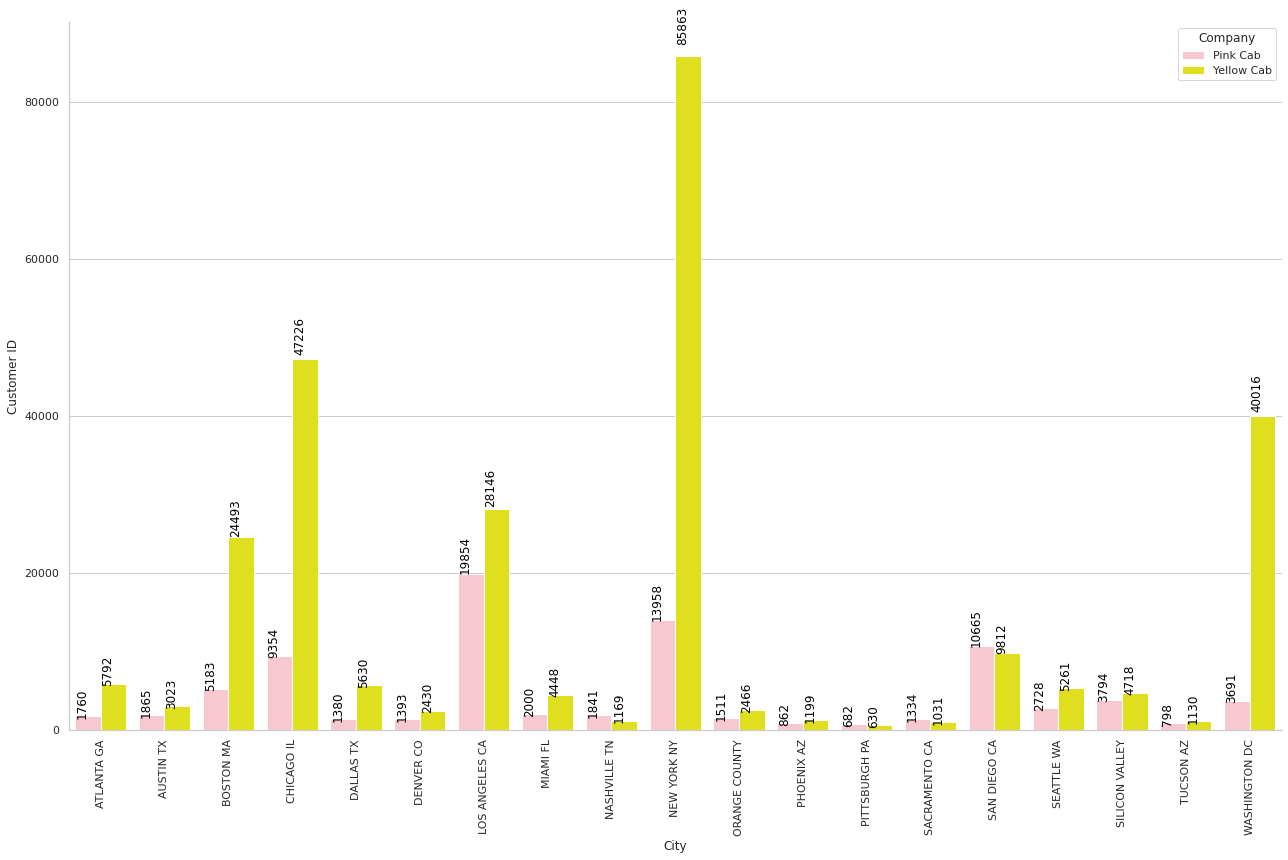

In [119]:
r = sns.catplot(x='City', y='Customer ID',hue='Company', data=graph23,kind='bar', height=12, aspect=1.5, palette=['pink', 'yellow'],legend='')
m = r.facet_axis(0,0)
for p in m.patches:
    m.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='vertical', size='large')
plt.xticks(rotation=90)
plt.legend(title = 'Company', bbox_to_anchor = (1, 1))
plt.tight_layout()

In [120]:
graph24=df_group[df_group['City']=='NEW YORK NY'].groupby(['Company','Year'])['Customer ID'].agg(['count'])
graph24

count
Company    Year       
Pink Cab   2016   4062
           2017   5078
           2018   4818
Yellow Cab 2016  25582
           2017  31061
           2018  29220

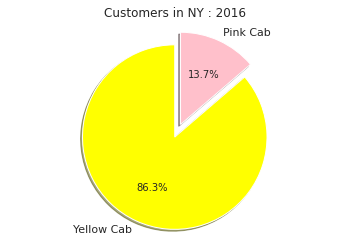

In [122]:
labels='Yellow Cab','Pink Cab'
xy=[graph24['count'].iloc[3],graph24['count'].iloc[0]]
fig, ax = plt.subplots()
explode = (0.15,0)
ax.pie(xy ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=['yellow','pink'])
ax.axis('equal')

plt.title('Customers in NY : 2016')
plt.show()

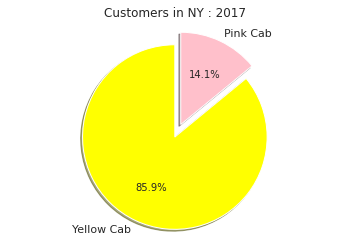

In [123]:
labels='Yellow Cab','Pink Cab'
xy1=[graph24['count'].iloc[4],graph24['count'].iloc[1]]
fig, ax = plt.subplots()
explode = (0.15,0)
ax.pie(xy1 ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=['yellow','pink'])
ax.axis('equal')
plt.title('Customers in NY : 2017')
plt.show()

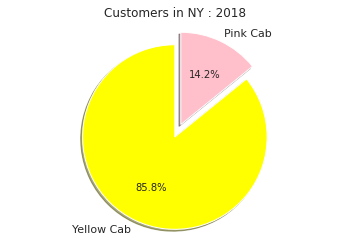

In [124]:
labels='Yellow Cab','Pink Cab'
xy2=[graph24['count'].iloc[5],graph24['count'].iloc[2]]
fig, ax = plt.subplots()
explode = (0.15,0)
ax.pie(xy2 ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=['yellow','pink'])
ax.axis('equal')
plt.title('Customers in NY : 2018')
plt.show()

In [125]:
graph25 = df_group[df_group['Month']==12].groupby('City')['Profit'].mean().sort_values(ascending=False)
graph25

City
NEW YORK NY       256.960292
SILICON VALLEY    161.895023
DENVER CO         111.039504
DALLAS TX         107.446985
MIAMI FL           98.461146
ATLANTA GA         96.014584
AUSTIN TX          90.914190
TUCSON AZ          83.347232
LOS ANGELES CA     78.646915
NASHVILLE TN       78.562590
SEATTLE WA         75.143237
PHOENIX AZ         72.807534
ORANGE COUNTY      71.565507
SAN DIEGO CA       67.626609
BOSTON MA          61.326197
WASHINGTON DC      60.956025
PITTSBURGH PA      51.079526
CHICAGO IL         49.418004
SACRAMENTO CA      24.153408
Name: Profit, dtype: float64

In [126]:
graph26 = df_group[df_group['Month']==12].groupby('City')['Customer ID'].count().sort_values(ascending=False)
graph26

City
NEW YORK NY       15255
CHICAGO IL         6592
LOS ANGELES CA     5697
WASHINGTON DC      4886
BOSTON MA          3658
SAN DIEGO CA       2424
MIAMI FL           1272
SILICON VALLEY     1096
ATLANTA GA          949
SEATTLE WA          875
DALLAS TX           873
AUSTIN TX           774
ORANGE COUNTY       576
DENVER CO           498
NASHVILLE TN        363
SACRAMENTO CA       304
PHOENIX AZ          251
TUCSON AZ           237
PITTSBURGH PA       171
Name: Customer ID, dtype: int64

####**4.4.6. Name_Holiday**

In [127]:
graph27=df_group[df_group['Name_Holiday']!='Today is not Holiday'].groupby(['Name_Holiday','Year','Company'])['Profit'].mean()
graph27

Name_Holiday                           Year  Company   
Christmas Day                          2016  Pink Cab      120.265089
                                             Yellow Cab    183.199448
                                       2017  Pink Cab       95.078526
                                             Yellow Cab    110.535986
                                       2018  Pink Cab       62.567203
                                             Yellow Cab    124.030353
Columbus Day                           2016  Pink Cab       46.832370
                                             Yellow Cab    122.831731
                                       2017  Pink Cab       55.664000
                                             Yellow Cab    127.996389
                                       2018  Pink Cab       51.692967
                                             Yellow Cab    108.540977
Independence Day                       2016  Pink Cab       36.946410
                                  

In [128]:
graph28=df_group[df_group['Name_Holiday']!='Today is not Holiday'].groupby(['Name_Holiday'])['Transaction ID'].\
        agg(['count']).sort_values(by='count',ascending=False)
graph28

count
Name_Holiday                                
Veterans Day                            1565
Christmas Day                           1331
Thanksgiving Day                        1166
Columbus Day                             673
Labor Day                                666
New Year Day                             610
Memorial Day                             449
Independence Day                         447
Presidents Day (Washingtons Birthday)    345
Martin Luther King Jr. Day               325

In [129]:
graph29=df_group[df_group['Name_Holiday']!='Today is not Holiday'].groupby(['Name_Holiday'])['Price Charged'].\
        agg(['sum']).sort_values(by='sum',ascending=False)
graph29

sum
Name_Holiday                                    
Veterans Day                           700373.44
Christmas Day                          570177.04
Thanksgiving Day                       432287.36
New Year Day                           257589.38
Columbus Day                           255025.38
Labor Day                              238544.85
Memorial Day                           189196.04
Independence Day                       177754.61
Presidents Day (Washingtons Birthday)  162889.76
Martin Luther King Jr. Day             138633.10

In [130]:
graph30=df_group[df_group['Name_Holiday']!='Today is not Holiday'].groupby(['Company','Name_Holiday'])['Profit'].agg(['sum'])
graph30

sum
Company    Name_Holiday                                     
Pink Cab   Christmas Day                           34583.629
           Columbus Day                             9749.662
           Independence Day                         3531.231
           Labor Day                                6222.128
           Martin Luther King Jr. Day               2844.527
           Memorial Day                             2077.527
           New Year Day                            14899.649
           Presidents Day (Washingtons Birthday)    2583.111
           Thanksgiving Day                        16255.065
           Veterans Day                            42498.378
Yellow Cab Christmas Day                          154119.569
           Columbus Day                            57962.032
           Independence Day                        42092.386
           Labor Day                               47833.702
           Martin Luther King Jr. Day              43604.198
           Memorial Day                            59612.361
           New Year Day                            64513.726
           Presidents Day (Washingtons Birthday)   55399.952
           Thanksgiving Day                        90744.534
           Veterans Day                           207604.796

In [132]:
graph31=df_group[df_group['Name_Holiday']!='Today is not Holiday'].groupby(['Name_Holiday'])['Cost of Trip'].agg(['sum']).sort_values(by='sum',ascending=False)
graph31

sum
Name_Holiday                                     
Veterans Day                           450270.266
Christmas Day                          381473.842
Thanksgiving Day                       325287.761
Columbus Day                           187313.686
Labor Day                              184489.020
New Year Day                           178176.005
Independence Day                       132130.993
Memorial Day                           127506.152
Presidents Day (Washingtons Birthday)  104906.697
Martin Luther King Jr. Day              92184.375

In [133]:
graph32=df_group[df_group['Name_Holiday']!='Today is not Holiday'].groupby(['Name_Holiday','Gender'])['Profit'].agg(['sum'])
graph32

sum
Name_Holiday                          Gender            
Christmas Day                         Female   74063.963
                                      Male    114639.235
Columbus Day                          Female   30758.798
                                      Male     36952.896
Independence Day                      Female   21125.897
                                      Male     24497.720
Labor Day                             Female   19988.536
                                      Male     34067.294
Martin Luther King Jr. Day            Female   12307.843
                                      Male     34140.882
Memorial Day                          Female   23311.529
                                      Male     38378.359
New Year Day                          Female   32145.483
                                      Male     47267.892
Presidents Day (Washingtons Birthday) Female   22895.767
                                      Male     35087.296
Thanksgiving Day                      Female   49165.015
                                      Male     57834.584
Veterans Day                          Female  102303.885
                                      Male    147799.289

####**4.4.7. Type**

In [134]:
graph33=df_group.groupby(['Type'])['Transaction ID'].count()
graph33

Type
Cold              10066
Fog               85059
Hail                506
Precipitation      3970
Rain             228815
Snow              28006
Storm              2714
Name: Transaction ID, dtype: int64

In [135]:
graph34=df_group.groupby(['Type'])['Price Charged'].agg(['sum'])
graph34['sum']=graph34['sum'].apply(lambda x: '{:0.2f}'.format(x)) #change result with scientific notation to float result
graph34

sum
Type                      
Cold            4210923.29
Fog            36062184.37
Hail             216595.92
Precipitation   1682733.41
Rain           96607470.13
Snow           12107466.11
Storm           1197897.37

In [136]:
graph35=df_group.groupby(['Type'])['Cost of Trip'].agg(['sum']).sort_values(by='sum',ascending=False)
graph35['sum']=graph35['sum'].apply(lambda x: '{:.2f}'.format(x))
graph35

sum
Type                      
Rain           65464286.05
Fog            24309527.80
Snow            8052088.46
Cold            2896772.20
Precipitation   1138272.61
Storm            778824.82
Hail             140028.84

In [137]:
graph36=df_group.groupby(['Company','Type'])['Customer ID'].agg(['count'])
graph36

count
Company    Type                 
Pink Cab   Cold             2482
           Fog             20250
           Hail              112
           Precipitation     944
           Rain            53969
           Snow             6283
           Storm             613
Yellow Cab Cold             7584
           Fog             64809
           Hail              394
           Precipitation    3026
           Rain           174846
           Snow            21723
           Storm            2101

In [138]:
graph37=df_group.groupby(['Type','Gender'])['Customer ID'].agg(['count'])
graph37

count
Type          Gender        
Cold          Female    4340
              Male      5726
Fog           Female   36278
              Male     48781
Hail          Female     217
              Male       289
Precipitation Female    1707
              Male      2263
Rain          Female   97874
              Male    130941
Snow          Female   11808
              Male     16198
Storm         Female    1145
              Male      1569

In [139]:
graph38=df_group.groupby(['Company','Type','Gender'])['Transaction ID'].agg(['count'])
graph38

count
Company    Type          Gender        
Pink Cab   Cold          Female    1109
                         Male      1373
           Fog           Female    8991
                         Male     11259
           Hail          Female      45
                         Male        67
           Precipitation Female     416
                         Male       528
           Rain          Female   23889
                         Male     30080
           Snow          Female    2759
                         Male      3524
           Storm         Female     244
                         Male       369
Yellow Cab Cold          Female    3231
                         Male      4353
           Fog           Female   27287
                         Male     37522
           Hail          Female     172
                         Male       222
           Precipitation Female    1291
                         Male      1735
           Rain          Female   73985
                         Male    100861
           Snow          Female    9049
                         Male     12674
           Storm         Female     901
                         Male      1200

In [142]:
graph39=df_group.groupby(['Company','Type','Gender'])['Profit'].agg(['sum'])
graph39['sum']=graph39['sum'].apply(lambda x: '{:.02f}'.format(x))
graph39

sum
Company    Type          Gender             
Pink Cab   Cold          Female     64368.78
                         Male       84740.10
           Fog           Female    574105.44
                         Male      725824.23
           Hail          Female      1721.84
                         Male        2011.34
           Precipitation Female     30673.07
                         Male       36445.43
           Rain          Female   1421057.20
                         Male     1817674.23
           Snow          Female    216758.68
                         Male      271715.24
           Storm         Female     20045.02
                         Male       35743.57
Yellow Cab Cold          Female    493454.42
                         Male      671587.79
           Fog           Female   4289772.44
                         Male     6162954.47
           Hail          Female     30440.74
                         Male       42393.17
           Precipitation Female    211780.89
                         Male      265561.41
           Rain          Female  11502804.63
                         Male    16401648.02
           Snow          Female   1443628.51
                         Male     2123275.22
           Storm         Female    151131.54
                         Male      212152.42

In [143]:
df_desc=df_group.copy()
df_desc

Customer ID  Gender  Age  ...  Month  Year   Profit
0             29290    Male   28  ...      1  2016   57.315
1             29290    Male   28  ...      7  2018  281.277
2             29290    Male   28  ...     11  2018  194.648
3             27703    Male   27  ...      1  2016   23.666
4             27703    Male   27  ...      4  2018  253.981
...             ...     ...  ...  ...    ...   ...      ...
359387        51406  Female   29  ...      3  2018  143.618
359388        51406  Female   29  ...      4  2018   23.046
359389        51406  Female   29  ...      7  2018   -5.854
359390        51406  Female   29  ...      8  2018   -6.090
359391        51406  Female   29  ...      8  2018   25.795

[359136 rows x 19 columns]

####**4.4.8. Profit**

In [144]:
df_desc=df_desc.query('Profit<=0')
df_desc

Customer ID  Gender  Age  Income (USD/Month)  ...  State Month  Year  Profit
39            28533    Male   39               28386  ...     CA     5  2016 -10.870
42            29039    Male   35               17761  ...     CO     7  2018  -0.186
45            28102    Male   39               14181  ...     DC    11  2017 -10.220
47            29494    Male   28                5644  ...     WA     4  2018 -12.550
59            29599    Male   27               12948  ...     PA     1  2017 -14.770
...             ...     ...  ...                 ...  ...    ...   ...   ...     ...
359299        51880  Female   59               22853  ...     PA    11  2018  -0.066
359310        52158  Female   59               19249  ...     CA     9  2017  -2.270
359354        51257    Male   39               15247  ...     MA    10  2018  -4.144
359389        51406  Female   29                6829  ...     NY     7  2018  -5.854
359390        51406  Female   29                6829  ...     IL     8  2018  -6.090

[24802 rows x 19 columns]

In [145]:
desc1=df_desc.groupby('Company')['Profit'].mean()
desc1

Company
Pink Cab     -20.364047
Yellow Cab   -18.921068
Name: Profit, dtype: float64

In [146]:
desc2=df_desc.groupby('Company')['Profit'].sum()
desc2

Company
Pink Cab     -226672.209
Yellow Cab   -258669.921
Name: Profit, dtype: float64

In [254]:
desc3=df_desc.groupby('Gender')['Profit'].sum()
desc3

Gender
Female   -213594.907
Male     -271747.223
Name: Profit, dtype: float64

In [148]:
desc4=df_desc.groupby(['Company','Gender'])['Profit'].mean()
desc4

Company     Gender
Pink Cab    Female   -20.378191
            Male     -20.352361
Yellow Cab  Female   -18.885353
            Male     -18.947990
Name: Profit, dtype: float64

In [149]:
desc5=df_desc.groupby('City')['Profit'].sum().sort_values(ascending=True)
desc5

City
CHICAGO IL       -155361.964
BOSTON MA         -78795.496
WASHINGTON DC     -50847.935
LOS ANGELES CA    -48690.415
SAN DIEGO CA      -18361.612
NASHVILLE TN      -18042.781
SEATTLE WA        -17909.586
DALLAS TX         -17430.748
DENVER CO         -14460.227
SACRAMENTO CA     -11657.934
PITTSBURGH PA      -9367.067
MIAMI FL           -8086.377
TUCSON AZ          -7338.393
PHOENIX AZ         -6589.591
NEW YORK NY        -6567.714
ATLANTA GA         -6521.400
ORANGE COUNTY      -3850.303
AUSTIN TX          -3773.670
SILICON VALLEY     -1688.917
Name: Profit, dtype: float64

In [150]:
desc6=df_desc.groupby(['Company','Payment_Mode'])['Profit'].sum()
desc6

Company     Payment_Mode
Pink Cab    Card           -134811.489
            Cash            -91860.720
Yellow Cab  Card           -155141.281
            Cash           -103528.640
Name: Profit, dtype: float64

In [151]:
desc7=df_desc.groupby(['City','Gender'])['Profit'].sum()
desc7

City            Gender
ATLANTA GA      Female    -3142.761
                Male      -3378.639
AUSTIN TX       Female    -2114.797
                Male      -1658.873
BOSTON MA       Female   -36309.553
                Male     -42485.943
CHICAGO IL      Female   -60544.810
                Male     -94817.154
DALLAS TX       Female    -7863.449
                Male      -9567.299
DENVER CO       Female    -7128.693
                Male      -7331.534
LOS ANGELES CA  Female   -22476.400
                Male     -26214.015
MIAMI FL        Female    -3832.145
                Male      -4254.232
NASHVILLE TN    Female    -9008.786
                Male      -9033.995
NEW YORK NY     Female    -2578.868
                Male      -3988.846
ORANGE COUNTY   Female    -2063.242
                Male      -1787.061
PHOENIX AZ      Female    -3274.568
                Male      -3315.023
PITTSBURGH PA   Female    -4785.026
                Male      -4582.041
SACRAMENTO CA   Female    -5934.236
     

In [152]:
desc8=df_desc.groupby(['Company','Month','Gender'])['Profit'].sum()
desc8

Company     Month  Gender
Pink Cab    1      Female    -4610.787
                   Male      -9370.083
            2      Female    -4212.197
                   Male      -5166.481
            3      Female    -4868.542
                   Male      -5501.847
            4      Female    -5537.991
                   Male      -7520.959
            5      Female   -12893.492
                   Male     -12929.380
            6      Female   -12201.473
                   Male     -13701.045
            7      Female    -9559.231
                   Male     -11509.315
            8      Female    -9400.629
                   Male     -12357.562
            9      Female   -12822.518
                   Male     -13917.880
            10     Female   -15099.774
                   Male     -15666.243
            11     Female    -6478.530
                   Male      -8922.086
            12     Female    -4939.407
                   Male      -7484.757
Yellow Cab  1      Female    -4345.805

In [255]:
desc9=df_desc.groupby(['Company','Month'])['Profit'].sum()
desc9

Company     Month
Pink Cab    1       -13980.870
            2        -9378.678
            3       -10370.389
            4       -13058.950
            5       -25822.872
            6       -25902.518
            7       -21068.546
            8       -21758.191
            9       -26740.398
            10      -30766.017
            11      -15400.616
            12      -12424.164
Yellow Cab  1        -9997.469
            2        -1798.707
            3       -10958.003
            4       -12895.671
            5        -4364.237
            6       -10458.595
            7       -49999.318
            8       -47836.201
            9       -12585.400
            10      -26519.627
            11      -36529.439
            12      -34727.254
Name: Profit, dtype: float64

In [153]:
desc10=df_desc.groupby(['Company','Year','Gender'])['Profit'].sum()
desc10

Company     Year  Gender
Pink Cab    2016  Female   -29850.292
                  Male     -41350.290
            2017  Female   -44339.514
                  Male     -50853.888
            2018  Female   -28434.765
                  Male     -31843.460
Yellow Cab  2016  Female   -34066.421
                  Male     -43971.205
            2017  Female   -44761.771
                  Male     -61416.564
            2018  Female   -32142.144
                  Male     -42311.816
Name: Profit, dtype: float64

In [154]:
graph_age = df_group.copy()
graph_age.head()

Customer ID Gender  Age  Income (USD/Month)  ...  State Month  Year   Profit
0        29290   Male   28               10813  ...     FL     1  2016   57.315
1        29290   Male   28               10813  ...     IL     7  2018  281.277
2        29290   Male   28               10813  ...     CA    11  2018  194.648
3        27703   Male   27                9237  ...     CA     1  2016   23.666
4        27703   Male   27                9237  ...     CO     4  2018  253.981

[5 rows x 19 columns]

####**4.4.9. Age**

In [155]:
bins=[18,25,33,42,65]
names=['18-25','26-33','34-42','43-65']
graph_age['Age']=pd.cut(graph_age['Age'], bins,labels=names)
graph_age.head()

Customer ID Gender    Age  Income (USD/Month)  ...  State Month  Year   Profit
0        29290   Male  26-33               10813  ...     FL     1  2016   57.315
1        29290   Male  26-33               10813  ...     IL     7  2018  281.277
2        29290   Male  26-33               10813  ...     CA    11  2018  194.648
3        27703   Male  26-33                9237  ...     CA     1  2016   23.666
4        27703   Male  26-33                9237  ...     CO     4  2018  253.981

[5 rows x 19 columns]

In [156]:
age1 = graph_age.groupby(['Company','Age'])['Customer ID'].nunique()
age1

Company     Age  
Pink Cab    18-25     7326
            26-33     8137
            34-42     7880
            43-65     7948
Yellow Cab  18-25     9027
            26-33    10110
            34-42     9726
            43-65     9766
Name: Customer ID, dtype: int64

In [157]:
age2 = graph_age.groupby(['Company','Age'])['Transaction ID'].nunique()
age2

Company     Age  
Pink Cab    18-25    19429
            26-33    21452
            34-42    20244
            43-65    20855
Yellow Cab  18-25    63011
            26-33    69517
            34-42    66271
            43-65    67522
Name: Transaction ID, dtype: int64

In [158]:
age3 = graph_age.groupby(['Company','Age'])['Customer ID'].count()
age3

Company     Age  
Pink Cab    18-25    19429
            26-33    21452
            34-42    20244
            43-65    20855
Yellow Cab  18-25    63011
            26-33    69517
            34-42    66271
            43-65    67522
Name: Customer ID, dtype: int64

In [159]:
age4 = graph_age.groupby(['Company','Age'])['Customer ID'].mean()
age4

Company     Age  
Pink Cab    18-25    18129.000206
            26-33    18617.544098
            34-42    18854.289715
            43-65    18071.082474
Yellow Cab  18-25    19155.924870
            26-33    19676.780874
            34-42    19949.218572
            43-65    18968.101108
Name: Customer ID, dtype: float64

In [160]:
age5 = graph_age.groupby(['Company','Gender','Age'])['Customer ID'].nunique()
age5

Company     Gender  Age  
Pink Cab    Female  18-25    3376
                    26-33    3743
                    34-42    3586
                    43-65    3625
            Male    18-25    3950
                    26-33    4394
                    34-42    4294
                    43-65    4323
Yellow Cab  Female  18-25    4115
                    26-33    4703
                    34-42    4464
                    43-65    4510
            Male    18-25    4912
                    26-33    5407
                    34-42    5262
                    43-65    5256
Name: Customer ID, dtype: int64

In [161]:
age6 = graph_age.groupby(['Company','Gender','Age'])['Transaction ID'].nunique()
age6

Company     Gender  Age  
Pink Cab    Female  18-25     8731
                    26-33     9569
                    34-42     8653
                    43-65     9298
            Male    18-25    10698
                    26-33    11883
                    34-42    11591
                    43-65    11557
Yellow Cab  Female  18-25    26603
                    26-33    30178
                    34-42    27094
                    43-65    28546
            Male    18-25    36408
                    26-33    39339
                    34-42    39177
                    43-65    38976
Name: Transaction ID, dtype: int64

In [162]:
age7 = graph_age.groupby(['Company','Gender','Age'])['Profit'].sum()
age7

Company     Gender  Age  
Pink Cab    Female  18-25     539520.560
                    26-33     606486.012
                    34-42     532163.256
                    43-65     575224.272
            Male    18-25     697559.700
                    26-33     740480.068
                    34-42     726075.500
                    43-65     718975.437
Yellow Cab  Female  18-25    4132033.086
                    26-33    4846642.736
                    34-42    4177967.479
                    43-65    4436483.156
            Male    18-25    5964626.103
                    26-33    6345312.638
                    34-42    6394731.308
                    43-65    6361801.844
Name: Profit, dtype: float64

In [163]:
age8 = graph_age[graph_age['Profit']<=0].groupby(['Month','Company','Age'])['Profit'].sum()
age8

Month  Company     Age  
1      Pink Cab    18-25   -3215.552
                   26-33   -3650.540
                   34-42   -3461.797
                   43-65   -3266.253
       Yellow Cab  18-25   -2197.890
                              ...   
12     Pink Cab    43-65   -3318.115
       Yellow Cab  18-25   -8497.037
                   26-33   -9214.324
                   34-42   -7732.042
                   43-65   -8384.266
Name: Profit, Length: 96, dtype: float64

In [164]:
age9 = graph_age[graph_age['Profit']<=0].groupby(['Month','Company','Gender','Age'])['Profit'].sum()
age9

Month  Company     Gender  Age  
1      Pink Cab    Female  18-25   -1314.131
                           26-33   -1152.041
                           34-42   -1238.078
                           43-65    -802.545
                   Male    18-25   -1901.421
                                      ...   
12     Yellow Cab  Female  43-65   -3955.538
                   Male    18-25   -5250.159
                           26-33   -5542.820
                           34-42   -4514.096
                           43-65   -4428.728
Name: Profit, Length: 192, dtype: float64

In [165]:
age10 = graph_age.groupby(['Company','Gender','Age'])['Price Charged'].mean()
age10=age10.reset_index()
age10

Company  Gender    Age  Price Charged
0     Pink Cab  Female  18-25     310.129604
1     Pink Cab  Female  26-33     313.233442
2     Pink Cab  Female  34-42     310.185086
3     Pink Cab  Female  43-65     308.303310
4     Pink Cab    Male  18-25     313.691419
5     Pink Cab    Male  26-33     310.319868
6     Pink Cab    Male  34-42     310.338281
7     Pink Cab    Male  43-65     309.958360
8   Yellow Cab  Female  18-25     453.316192
9   Yellow Cab  Female  26-33     457.474570
10  Yellow Cab  Female  34-42     452.760987
11  Yellow Cab  Female  43-65     455.082517
12  Yellow Cab    Male  18-25     462.164242
13  Yellow Cab    Male  26-33     458.928486
14  Yellow Cab    Male  34-42     460.531586
15  Yellow Cab    Male  43-65     460.845107

In [167]:
age11 = graph_age.groupby(['Company','Age'])['Price Charged'].mean()
age11

Company     Age  
Pink Cab    18-25    312.090811
            26-33    311.619513
            34-42    310.272800
            43-65    309.220472
Yellow Cab  18-25    458.428630
            26-33    458.297327
            34-42    457.354682
            43-65    458.408881
Name: Price Charged, dtype: float64

In [168]:
age12=graph_age.groupby(['Company','Age']).agg({'Customer ID':'count','Profit':'mean'})
age12

Customer ID      Profit
Company    Age                           
Pink Cab   18-25        19429   63.671844
           26-33        21452   62.789767
           34-42        20244   62.153663
           43-65        20855   62.057047
Yellow Cab 18-25        63011  160.236454
           26-33        69517  160.995949
           34-42        66271  159.537336
           43-65        67522  159.922470

In [169]:
age13=graph_age[(graph_age['Age']=='26-33')&(graph_age['Profit']<=0)].groupby(['Company','Gender']).\
      agg({'Transaction ID':'count','Price Charged':'sum','Cost of Trip':'sum','Profit':'sum'})
age13

Transaction ID  Price Charged  Cost of Trip     Profit
Company    Gender                                                        
Pink Cab   Female            1250      297501.96    323105.346 -25603.386
           Male              1599      372084.43    405126.216 -33041.786
Yellow Cab Female            1495      435994.59    464185.317 -28190.727
           Male              1914      550904.66    588260.465 -37355.805

In [170]:
age14=graph_age[graph_age['Company']=='Yellow Cab'].groupby(['Customer ID'])['Transaction ID'].agg(['count'])
age14.rename(columns={'count':'Total'},inplace=True)
age14.sort_values(by='Total', ascending=False).head(10)

Total
Customer ID       
1803            47
494             47
1360            47
636             46
2766            45
126             45
903             45
2539            44
992             44
2577            44

In [171]:
yellow=[1803,494,1360,2766,126,903,2539,992,2577]
for i in yellow:
    graph15=graph_age[graph_age['Customer ID']==i].groupby(['Company'])['Transaction ID'].agg(['count'])
    graph15.rename(columns={'count':'Total'},inplace=True)
    print('Customer ID =',i,'Yellow Cab :',graph15['Total'].iloc[1], 'Pink Cab :',graph15['Total'].iloc[0], sep='\t')  

Customer ID =	1803	Yellow Cab :	47	Pink Cab :	3
Customer ID =	494	Yellow Cab :	47	Pink Cab :	7
Customer ID =	1360	Yellow Cab :	47	Pink Cab :	2
Customer ID =	2766	Yellow Cab :	45	Pink Cab :	6
Customer ID =	126	Yellow Cab :	45	Pink Cab :	5
Customer ID =	903	Yellow Cab :	45	Pink Cab :	5
Customer ID =	2539	Yellow Cab :	44	Pink Cab :	5
Customer ID =	992	Yellow Cab :	44	Pink Cab :	3
Customer ID =	2577	Yellow Cab :	44	Pink Cab :	5


In [172]:
age16=graph_age[graph_age['Company']=='Pink Cab'].groupby(['Customer ID'])['Transaction ID'].agg(['count'])
age16.sort_values(by='count', ascending=False).head(10)

count
Customer ID       
8120            18
8595            17
6159            17
7927            17
8915            16
8474            16
7340            16
7938            15
8119            15
8721            15

In [173]:
pink=[8120,8595,6159,7927,8915,8474,7340,7938,8119,8721]
for i in pink:
  if i in graph_age['Customer ID']:
    graph17=graph_age[graph_age['Customer ID']==i].groupby(['Company'])['Transaction ID'].agg(['count'])
    graph17.rename(columns={'count':'Total'},inplace=True)
    print('Customer ID = ',i,' Pink Cab : ',graph17['Total'].iloc[0],' Yellow Cab : ',graph17['Total'].iloc[1])

Customer ID =  8120  Pink Cab :  18  Yellow Cab :  9
Customer ID =  8595  Pink Cab :  17  Yellow Cab :  14
Customer ID =  6159  Pink Cab :  17  Yellow Cab :  17
Customer ID =  7927  Pink Cab :  17  Yellow Cab :  15
Customer ID =  8915  Pink Cab :  16  Yellow Cab :  9
Customer ID =  8474  Pink Cab :  16  Yellow Cab :  11
Customer ID =  7340  Pink Cab :  16  Yellow Cab :  12
Customer ID =  7938  Pink Cab :  15  Yellow Cab :  6
Customer ID =  8119  Pink Cab :  15  Yellow Cab :  14
Customer ID =  8721  Pink Cab :  15  Yellow Cab :  5


In [184]:
graph_income=df_group.copy()
graph_income.head()

Customer ID Gender  Age  Income (USD/Month)  ...  State Month  Year   Profit
0        29290   Male   28               10813  ...     FL     1  2016   57.315
1        29290   Male   28               10813  ...     IL     7  2018  281.277
2        29290   Male   28               10813  ...     CA    11  2018  194.648
3        27703   Male   27                9237  ...     CA     1  2016   23.666
4        27703   Male   27                9237  ...     CO     4  2018  253.981

[5 rows x 19 columns]

####**4.4.10. Income (USD/Month)**

In [185]:
bins=[2000,10514,18898,35000]
names=['2000-10514', '10515-18898', '18898-35000']
graph_income['Income (USD/Month)']=pd.cut(graph_income['Income (USD/Month)'], bins,labels=names)
graph_income.head()

Customer ID Gender  Age Income (USD/Month)  ...  State Month  Year   Profit
0        29290   Male   28        10515-18898  ...     FL     1  2016   57.315
1        29290   Male   28        10515-18898  ...     IL     7  2018  281.277
2        29290   Male   28        10515-18898  ...     CA    11  2018  194.648
3        27703   Male   27         2000-10514  ...     CA     1  2016   23.666
4        27703   Male   27         2000-10514  ...     CO     4  2018  253.981

[5 rows x 19 columns]

In [186]:
income1=graph_income.groupby(['Year',"Company",'Income (USD/Month)'])['Profit'].sum()
income1

Year  Company     Income (USD/Month)
2016  Pink Cab    2000-10514             555907.724
                  10515-18898            571121.538
                  18898-35000            586481.962
      Yellow Cab  2000-10514            4560320.662
                  10515-18898           4732646.331
                  18898-35000           4633846.465
2017  Pink Cab    2000-10514             683785.116
                  10515-18898            656403.259
                  18898-35000            693472.521
      Yellow Cab  2000-10514            5424912.142
                  10515-18898           5534247.617
                  18898-35000           5616539.569
2018  Pink Cab    2000-10514             522584.351
                  10515-18898            515596.622
                  18898-35000            517427.160
      Yellow Cab  2000-10514            4437879.048
                  10515-18898           4545442.329
                  18898-35000           4515725.927
Name: Profit, dtype: float6

In [187]:
income2=graph_income.groupby(['Year',"Company",'Income (USD/Month)'])['Profit'].mean()
income2

Year  Company     Income (USD/Month)
2016  Pink Cab    2000-10514             67.171064
                  10515-18898            68.710483
                  18898-35000            69.062878
      Yellow Cab  2000-10514            166.556635
                  10515-18898           171.534843
                  18898-35000           169.937159
2017  Pink Cab    2000-10514             67.481014
                  10515-18898            65.791647
                  18898-35000            67.920913
      Yellow Cab  2000-10514            166.792072
                  10515-18898           169.367353
                  18898-35000           170.270405
2018  Pink Cab    2000-10514             52.919934
                  10515-18898            53.646511
                  18898-35000            52.987932
      Yellow Cab  2000-10514            141.419300
                  10515-18898           144.552149
                  18898-35000           144.618925
Name: Profit, dtype: float64

In [188]:
income3=graph_income[graph_income['Company']=='Pink Cab'].groupby(['Year',"Company",'Income (USD/Month)'])['Profit'].sum()
income3

Year  Company   Income (USD/Month)
2016  Pink Cab  2000-10514            555907.724
                10515-18898           571121.538
                18898-35000           586481.962
2017  Pink Cab  2000-10514            683785.116
                10515-18898           656403.259
                18898-35000           693472.521
2018  Pink Cab  2000-10514            522584.351
                10515-18898           515596.622
                18898-35000           517427.160
Name: Profit, dtype: float64

In [189]:
income4=graph_income[graph_income['Company']=='Yellow Cab'].groupby(['Year',"Company",'Income (USD/Month)'])['Profit'].sum()
income4

Year  Company     Income (USD/Month)
2016  Yellow Cab  2000-10514            4560320.662
                  10515-18898           4732646.331
                  18898-35000           4633846.465
2017  Yellow Cab  2000-10514            5424912.142
                  10515-18898           5534247.617
                  18898-35000           5616539.569
2018  Yellow Cab  2000-10514            4437879.048
                  10515-18898           4545442.329
                  18898-35000           4515725.927
Name: Profit, dtype: float64

In [190]:
income5=graph_income[graph_income['Company']=='Yellow Cab'].groupby(['Year',"Company",'Income (USD/Month)'])['Transaction ID'].count()
income5

Year  Company     Income (USD/Month)
2016  Yellow Cab  2000-10514            27380
                  10515-18898           27590
                  18898-35000           27268
2017  Yellow Cab  2000-10514            32525
                  10515-18898           32676
                  18898-35000           32986
2018  Yellow Cab  2000-10514            31381
                  10515-18898           31445
                  18898-35000           31225
Name: Transaction ID, dtype: int64

In [256]:
income6=graph_income[graph_income['Company']=='Pink Cab'].groupby(['Year',"Company",'Income (USD/Month)'])['Transaction ID'].count()
income6

Year  Company   Income (USD/Month)
2016  Pink Cab  2000-10514             8276
                10515-18898            8312
                18898-35000            8492
2017  Pink Cab  2000-10514            10133
                10515-18898            9977
                18898-35000           10210
2018  Pink Cab  2000-10514             9875
                10515-18898            9611
                18898-35000            9765
Name: Transaction ID, dtype: int64

In [257]:
income7=graph_income[(graph_income['Company']=='Yellow Cab')&(graph_income['Profit']<=0)].\
       groupby(['Gender','Year','Income (USD/Month)'])['Profit'].sum()
income7

Gender  Year  Income (USD/Month)
Female  2016  2000-10514           -11928.948
              10515-18898          -10567.822
              18898-35000          -11569.651
        2017  2000-10514           -15725.871
              10515-18898          -14833.849
              18898-35000          -14202.051
        2018  2000-10514           -10627.269
              10515-18898          -11214.140
              18898-35000          -10300.735
Male    2016  2000-10514           -14803.272
              10515-18898          -14121.540
              18898-35000          -15046.393
        2017  2000-10514           -20874.402
              10515-18898          -20425.600
              18898-35000          -20116.562
        2018  2000-10514           -13330.284
              10515-18898          -14401.164
              18898-35000          -14580.368
Name: Profit, dtype: float64

In [258]:
income8=graph_income[(graph_income['Company']=='Pink Cab')&(graph_income['Profit']<=0)].\
        groupby(['Gender','Year','Income (USD/Month)'])['Profit'].sum()
income8

Gender  Year  Income (USD/Month)
Female  2016  2000-10514            -9373.330
              10515-18898          -10323.167
              18898-35000          -10153.795
        2017  2000-10514           -14626.019
              10515-18898          -15017.624
              18898-35000          -14695.871
        2018  2000-10514           -10212.455
              10515-18898           -8987.362
              18898-35000           -9234.948
Male    2016  2000-10514           -13801.660
              10515-18898          -12977.503
              18898-35000          -14571.127
        2017  2000-10514           -16247.241
              10515-18898          -18725.225
              18898-35000          -15875.434
        2018  2000-10514           -11321.033
              10515-18898          -10007.010
              18898-35000          -10515.417
Name: Profit, dtype: float64

In [195]:
chart_studio.tools.set_credentials_file(username='bigdatagal', api_key='hvginfgvwe')

map = df_group.groupby(['State']).agg({'Population': 'sum', 'Transaction ID': 'count','Profit': 'mean'}).reset_index()
map['text'] = 'TRANSACTION '+map['Transaction ID'].astype(str)+'<br>'+' POPULATION '+map['Population'].astype(str)+'<br>'+\
'State '+map['State']

data=[dict(type='choropleth',
           autocolorscale=False, 
           locations = map['State'], 
           z = map['Profit'], 
           locationmode='USA-states', 
           text=map['text'],
           marker=dict(line=dict(color='rgb(255,255,255)',width=2)),
           colorbar = dict(title="Profit"))]

layout = dict(title='Profit and Transaction of Customer by State', 
              geo = dict(scope = 'usa' , 
                         projection = dict(type= 'albers usa'), 
                         #showlakes=True, 
                         lakecolor= 'rgb(255,255,255)'),)

fig = dict(data=data, layout=layout)
pyo.iplot(fig, filename='d3-choropleth-map')

##**5. SIMPLE LINEAR REGRESSION**

In [197]:
df_column=df_group.copy()
df_column.rename(columns={'Customer ID':'Customer_ID', 'Income (USD/Month)':'Income', 'Transaction ID':'Transaction_ID',
       'KM Travelled':'KM_Travelled', 'Price Charged':'Price_Charged','Cost of Trip':'Cost_of_Trip'},inplace=True)
df_column

Customer_ID  Gender  Age  Income  ...  State Month  Year   Profit
0             29290    Male   28   10813  ...     FL     1  2016   57.315
1             29290    Male   28   10813  ...     IL     7  2018  281.277
2             29290    Male   28   10813  ...     CA    11  2018  194.648
3             27703    Male   27    9237  ...     CA     1  2016   23.666
4             27703    Male   27    9237  ...     CO     4  2018  253.981
...             ...     ...  ...     ...  ...    ...   ...   ...      ...
359387        51406  Female   29    6829  ...     CA     3  2018  143.618
359388        51406  Female   29    6829  ...     WA     4  2018   23.046
359389        51406  Female   29    6829  ...     NY     7  2018   -5.854
359390        51406  Female   29    6829  ...     IL     8  2018   -6.090
359391        51406  Female   29    6829  ...     TX     8  2018   25.795

[359136 rows x 19 columns]

> Dependent variable: 
 
>* Profit

> Independent variable:

>* [Transaction_ID](#Transaction_IDl)
>* [Price_Charged](#Price_Chargedl)
>* [Cost_of_Trip](#Cost_of_Tripl)
>* [Age](#Agel)
>* [Income](#Incomel)
>* [KM_Travelled](#KM_Travelledl)

* [spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) : Calculate a Spearman correlation coefficient with associated p-value.

* [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html?highlight=pearson#scipy.stats.pearsonr) : Pearson correlation coefficient and p-value for testing non-correlation.



<a name="Transaction_IDl"></a>
> Profit ~ Transaction_ID


In [208]:
model=ols('Profit ~ Transaction_ID', df_column).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2730.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:21   Log-Likelihood:            -2.3317e+06
No. Observations:              359136   AIC:                         4.663e+06
Df Residuals:                  359134   BIC:                         4.663e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1260.5117     21.500     58.

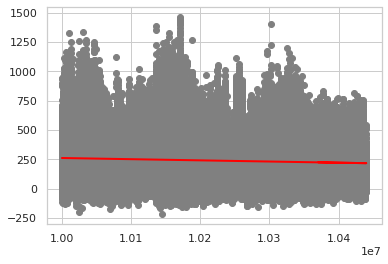

In [209]:
x=df_column.Transaction_ID 
y=df_column.Profit

plt.scatter(x,y, color='grey')
plt.plot(x, 1260.51+(-0.0001)*x, color='red',linewidth=2)
plt.show()

In [210]:
print("Spearmanr: ",spearmanr(df_column.Transaction_ID,df_column.Profit))
print("Pearsonr: ", pearsonr(df_column.Transaction_ID, df_column.Profit))

Spearmanr:  SpearmanrResult(correlation=-0.07971516109010543, pvalue=0.0)
Pearsonr:  (-0.08685455276530328, 0.0)


<a name="Price_Chargedl"></a>
> Profit ~ Price_Charged


In [211]:
model=ols('Profit ~ Price_Charged', df_column).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.059e+06
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:31   Log-Likelihood:            -2.0864e+06
No. Observations:              359136   AIC:                         4.173e+06
Df Residuals:                  359134   BIC:                         4.173e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -76.5473      0.248   -309.219

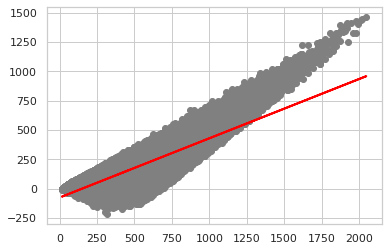

In [212]:
x=df_column.Price_Charged 
y=df_column.Profit

plt.scatter(x,y, color='grey')
plt.plot(x, -76.55+0.5050*x, color='red',linewidth=2)
plt.show()

In [213]:
print("Spearmanr: ",spearmanr(df_column.Price_Charged,df_column.Profit))
print("Pearsonr: ",pearsonr(df_column.Price_Charged, df_column.Profit))

Spearmanr:  SpearmanrResult(correlation=0.7904774967393174, pvalue=0.0)
Pearsonr:  (0.864200849826136, 0.0)


<a name="Cost_of_Tripl"></a>
> Profit ~ Cost_of_Trip

In [214]:
model=ols('Profit ~ Cost_of_Trip', df_column).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 1.111e+05
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:43   Log-Likelihood:            -2.2846e+06
No. Observations:              359136   AIC:                         4.569e+06
Df Residuals:                  359134   BIC:                         4.569e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9007      0.484     -8.063   

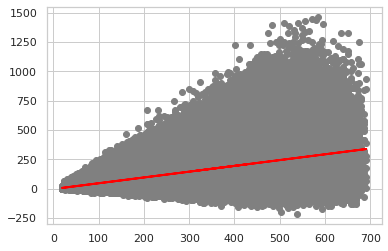

In [215]:
x=df_column.Cost_of_Trip 
y=df_column.Profit

plt.scatter(x,y, color='grey')
plt.plot(x, -3.9007+0.4933*x, color='red',linewidth=2)
plt.show()

In [216]:
print("Spearmanr: ",spearmanr(df_column.Cost_of_Trip,df_column.Profit))
print("Pearsonr: ",pearsonr(df_column.Cost_of_Trip, df_column.Profit))

Spearmanr:  SpearmanrResult(correlation=0.5046750767533829, pvalue=0.0)
Pearsonr:  (0.48613494033519056, 0.0)


<a name="Agel"></a>
> Profit ~ Age


In [217]:
model=ols('Profit ~ Age', df_column).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.283
Date:                Mon, 08 Mar 2021   Prob (F-statistic):            0.00231
Time:                        02:41:53   Log-Likelihood:            -2.3330e+06
No. Observations:              359136   AIC:                         4.666e+06
Df Residuals:                  359134   BIC:                         4.666e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    139.5764      0.797    175.139      0.0

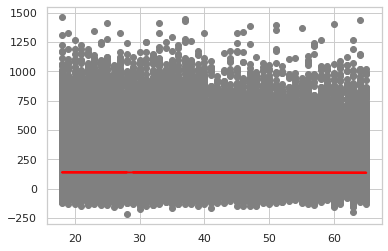

In [218]:
x=df_column.Age
y=df_column.Profit

plt.scatter(x,y, color='grey')
plt.plot(x, 139.5764+(-0.0647)*x, color='red',linewidth=2)
plt.show()

In [219]:
print("Spearmanr: ",spearmanr(df_column.Age,df_column.Profit))
print("Pearsonr: ",pearsonr(df_column.Age, df_column.Profit))

Spearmanr:  SpearmanrResult(correlation=-0.004501549436538191, pvalue=0.006982224354751148)
Pearsonr:  (-0.005084159925385102, 0.002312590446069426)


<a name="Incomel"></a>
> Profit ~ Income


In [220]:
model=ols('Profit ~ Income', df_column).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.55
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           0.000233
Time:                        02:42:06   Log-Likelihood:            -2.3330e+06
No. Observations:              359136   AIC:                         4.666e+06
Df Residuals:                  359134   BIC:                         4.666e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.4296      0.572    236.893      0.0

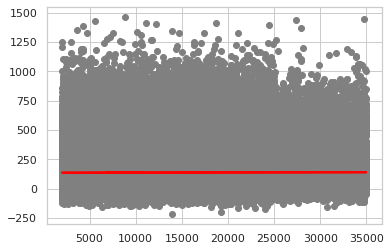

In [221]:
x=df_column.Income
y=df_column.Profit

plt.scatter(x,y, color='grey')
plt.plot(x, 135.4296+0.0001*x, color='red',linewidth=2)
plt.show()

In [222]:
print("Spearmanr: ",spearmanr(df_column.Income,df_column.Profit))
print("Pearsonr: ",pearsonr(df_column.Income, df_column.Profit))

Spearmanr:  SpearmanrResult(correlation=0.00558158121625741, pvalue=0.0008229978273556326)
Pearsonr:  (0.0061416534797935265, 0.00023269551115567168)


<a name="KM_Travelledl"></a>
> Profit ~ KM_Travelled

In [223]:
model=ols('Profit ~ KM_Travelled', df_column).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                 9.790e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:42:18   Log-Likelihood:            -2.2897e+06
No. Observations:              359136   AIC:                         4.579e+06
Df Residuals:                  359134   BIC:                         4.580e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3974      0.498      0.799   

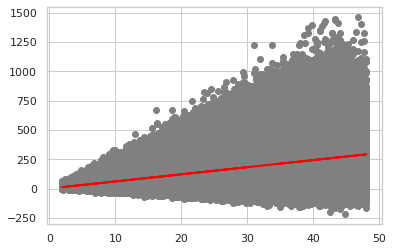

In [224]:
x=df_column.KM_Travelled
y=df_column.Profit

plt.scatter(x,y, color='grey')
plt.plot(x, 0.3974+6.0660*x, color='red',linewidth=2)
plt.show()

In [225]:
print("Spearmanr: ",spearmanr(df_column.KM_Travelled,df_column.Profit))
print("Pearsonr: ",pearsonr(df_column.KM_Travelled, df_column.Profit))

Spearmanr:  SpearmanrResult(correlation=0.485618243522873, pvalue=0.0)
Pearsonr:  (0.4628235382710596, 0.0)


##**6.TESTING HYPOTHESIS**

###6.1. There is almost equal Distribution of gender in the Profit and customer base of both the cabs

In [226]:
a = df_group[(df_group['Gender']=='Female')&(df_group['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
b = df_group[(df_group['Gender']=='Male')&(df_group['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

18389 21495
We rejected H0(null hypothesis), theres a statistical difference
P value is  0.005076736109327712


In [227]:
a = df_group[(df_group['Gender']=='Female')&(df_group['Company']=='Pink Cab')].groupby('Customer ID')['Profit'].mean()
b = df_group[(df_group['Gender']=='Male')&(df_group['Company']=='Pink Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

14815 17504
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.6333505257659662


###6.2. Middle class and high class contributes more in the profit as well as in the customer base of both the cabs

In [228]:
a = graph_income[(graph_income['Income (USD/Month)']=='10515-18898')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
b = graph_income[(graph_income['Income (USD/Month)']=='18898-35000')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
c = graph_income[(graph_income['Income (USD/Month)']=='2000-10514')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0],c.shape[0])

_, p_value = stats.f_oneway(a.values, b.values,c.values)

if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

13140 13226 13516
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.8686001750425463


In [229]:
a = graph_income[(graph_income['Income (USD/Month)']=='2000-10514')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
b = graph_income[(graph_income['Income (USD/Month)']=='18898-35000')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

13516 13226
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.6575396520379868


In [230]:
a = graph_income[(graph_income['Income (USD/Month)']=='2000-10514')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
b = graph_income[(graph_income['Income (USD/Month)']=='10515-18898')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

13516 13140
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.635433630612393


In [231]:
a = graph_income[(graph_income['Income (USD/Month)']=='10515-18898')&(graph_income['Company']=='Pink Cab')].groupby('Customer ID')['Profit'].mean()
b = graph_income[(graph_income['Income (USD/Month)']=='18898-35000')&(graph_income['Company']=='Pink Cab')].groupby('Customer ID')['Profit'].mean()
c = graph_income[(graph_income['Income (USD/Month)']=='2000-10514')&(graph_income['Company']=='Pink Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0],c.shape[0])

_, p_value = stats.f_oneway(a.values, b.values,c.values)

if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

10630 10841 10846
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.6327344881639883


In [232]:
a = graph_income[(graph_income['Income (USD/Month)']=='2000-10514')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
b = graph_income[(graph_income['Income (USD/Month)']=='18898-35000')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

13516 13226
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.6575396520379868


In [233]:
a = graph_income[(graph_income['Income (USD/Month)']=='2000-10514')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
b = graph_income[(graph_income['Income (USD/Month)']=='10515-18898')&(graph_income['Company']=='Yellow Cab')].groupby('Customer ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

13516 13140
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.635433630612393


###6.3 Yellow cab higher customer base as compared to Pink cab.

In [234]:
a = df_group[(df_group['Company']=='Pink Cab')&(df_group['Year']==2016)].groupby('Customer ID')['Transaction ID'].count()
b = df_group[(df_group['Company']=='Pink Cab')&(df_group['Year']==2017)].groupby('Customer ID')['Transaction ID'].count()
c = df_group[(df_group['Company']=='Pink Cab')&(df_group['Year']==2018)].groupby('Customer ID')['Transaction ID'].count()
print(a.shape[0],b.shape[0],c.shape[0])

_, p_value = stats.f_oneway(a.values, b.values,c.values)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

16661 18643 18378
We rejected H0(null hypothesis), theres a statistical difference
P value is  8.700520871611963e-33


In [235]:
a = df_group[(df_group['Company']=='Yellow Cab')&(df_group['Year']==2016)].groupby('Customer ID')['Transaction ID'].count()
b = df_group[(df_group['Company']=='Yellow Cab')&(df_group['Year']==2017)].groupby('Customer ID')['Transaction ID'].count()
c = df_group[(df_group['Company']=='Yellow Cab')&(df_group['Year']==2018)].groupby('Customer ID')['Transaction ID'].count()
print(a.shape[0],b.shape[0],c.shape[0])

_, p_value = stats.f_oneway(a.values, b.values,c.values)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

25937 27789 27444
We rejected H0(null hypothesis), theres a statistical difference
P value is  1.9087589793163306e-42


###6.4. There is difference in profit for age in Yellow Cab

In [ ]:
a = df_group[(df_group['Age']<=25)&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[((df_group['Age']>25)&(df_group['Age']<=33))&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
c = df_group[((df_group['Age']>33)&(df_group['Age']<=42))&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
d = df_group[(df_group['Age']>42)&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0],c.shape[0],d.shape[0])

_, p_value = stats.f_oneway(a.values, b.values,c.values,d.values)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

In [237]:
a = df_group[(df_group['Age']<=25)&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[((df_group['Age']>25)&(df_group['Age']<=33))&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=False)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

22102 21452
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.3417813806511112


In [ ]:
a = df_group[((df_group['Age']>25)&(df_group['Age']<=33))&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[((df_group['Age']>33)&(df_group['Age']<=42))&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=False)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

In [ ]:
a = df_group[((df_group['Age']>33)&(df_group['Age']<=42))&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[(df_group['Age']>42)&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=False)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

In [ ]:
a = df_group[(df_group['Age']<=25)&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[((df_group['Age']>25)&(df_group['Age']<=33))&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
c = df_group[((df_group['Age']>33)&(df_group['Age']<=42))&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
d = df_group[(df_group['Age']>42)&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0],c.shape[0],d.shape[0])

_, p_value = stats.f_oneway(a.values, b.values,c.values,d.values)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

In [241]:
a = df_group[(df_group['Age']<=25)&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[((df_group['Age']>25)&(df_group['Age']<=33))&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=False)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

71173 69517
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.7719661495267471


In [242]:
a = df_group[((df_group['Age']>25)&(df_group['Age']<=33))&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[((df_group['Age']>33)&(df_group['Age']<=42))&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=False)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

69517 66271
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.11805458735370175


In [243]:
a = df_group[((df_group['Age']>33)&(df_group['Age']<=42))&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[(df_group['Age']>42)&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=False)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

66271 67522
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.6816397708187809


###6.5. there is difference in profit for Card and Cash payment mode

In [244]:
a = df_group[(df_group['Payment_Mode']=='Cash')&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[(df_group['Payment_Mode']=='Card')&(df_group['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

33969 50684
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.7900345052079424


In [245]:
a = df_group[(df_group['Payment_Mode']=='Cash')&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_group[(df_group['Payment_Mode']=='Card')&(df_group['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

109820 164663
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.29528401798411563


###6.6. Female have more descount than Male

In [247]:
a = df_desc[(df_desc['Gender']=='Female')&(df_desc['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_desc[(df_desc['Gender']=='Male')&(df_desc['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
p_value
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

5876 7795
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.8581629947097997


In [248]:
a = df_desc[(df_desc['Gender']=='Female')&(df_desc['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
b = df_desc[(df_desc['Gender']=='Male')&(df_desc['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
p_value
if p_value<0.05:
    print('We rejected H0(null hypothesis), theres a statistical difference')
else:
    print('We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference')
    
print('P value is ', p_value)

5036 6095
We do not have enough evidence to reject H0(null hypothesis), theres no statistical difference
P value is  0.9518030740048185


##**8. ABSTRACT**

- There is a preference for payment by card and further discounts are made when paying by card.
- There is more Profit in Yellow Cab men instead Pink Cab that it remains the same

- Profit has been decreasing every year in both Cab
- The Price Charged has decreased in 2018 in both Cab while the Cost of Trip does not vary much
- the average of KM Travelled is almost the same every year in both Cab and in October, November and December there is a higher KM Traveled in both Cab.
- The city with more KM Travelled and Customer ID  by Pink Cab is Los Angeles CA
- The city with more KM Travelled and Customer ID  by Yellow Cab is New York NY and this City provides the most Profit and Customer ID on December
- The cities with the highest Transaction IDs are NEW YORK NY, CHICAGO IL, LOS ANGELES CA, WASHINGTON DC
- Veternas Day has more Transaction ID, Customer ID, Profit, Cost of Trip
- In the rainy season, you take the Cab service more
- the average discount is higher in pink cab than yellow cab
- the average of discounts by gender is almost the same pink cab and yellow cab
- there is more discount is in Chicago IL city
- AUSTIN TX, ORANGE COUNT, PITTSBURGH PA, SACRAMENTO CA, TUCSON AZ cities that discount more to women than men

- pink cab make less discount on December, February and March and increase its discounts by May, June and October
- yellow cab who will make more discounts the last two months of the year and lower your discount in the first months
- there is more discounts to men than women
- the age range 26-33 you have more Costumer ID, Transaction ID, Profit, it is waht have more discounts and price Charged

- yellow cab customers use very little pink cab
- pink cab customers also use pink cab and sometimes the same amount of Transaction ID

- The middle and upper class are the ones that give the most benefits in both taxis.

- Discounts for lower class women and higher discounts for upper class men in Yellow Cab
- Greater discount to the middle class in women and in men 2016 upper class, 2017 middle class, 2018 lower class in pink cab

##**9. CONCLUSION**

- Yellow Cab is dominating the market
- Customer preffers pay by card instead the cash
- Profit has been decreasing every year in both Cab
- December is a month when there is more trip, this month Yellow Cab offers more discount instead of Pink Cab.
- There is more discounts to men than women.
- Both Cab have more profit, trip and discount to range age in 26 to 33
- Some Customer of Yellow Cab use Pink Cab too, but the mayority of customer of Pink Cab uses the Yellow Cab

##**10. REPORT TO XYZ FIRM**

1. Yellow Cab are dominating the market and haven't lost much business to Pink Cabs and above all it has more profits.

2. Nueva York es la ciudad con más visitantes al año y es la ciudad en la que Yellow Cab tiene más presencia.

3. Pink Cab has potential and can grow much more if implemented some policies better

4. Yellow Cab has the politice to give more discount in higth season and decrease in slow seasons.

5. Yellow Cab increases its margins when there are less customers and decrease when there is season, and I beleive thats a good business model

6. I believe that yellow cab will continue to dominate the market for a longer period of time